In [1]:
import pickle
import cv2
import glob
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Camera Calibration and distortion-correction

In [2]:
def calibrate_camera():
    images = glob.glob('camera_cal/calibration*.jpg')
    #plt.imshow(img)

    objpoints = []
    imgpoints = []

    for fname in images:
        img = cv2.imread(fname)
    #     plt.imshow(img)
        nx = 9
        ny = 6
        objp = np.zeros((ny*nx,3),np.float32)
        objp[:,:2] =  np.mgrid[0:nx,0:ny].T.reshape(-1,2)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

        if ret == True and objp.shape[0] == corners.shape[0] and gray.shape[::-1]  == (1280,720) :
    #         print(objp.shape, corners.shape)
    #         print(corners)
            objpoints.append(objp)
            imgpoints.append(corners)
            img_draw = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return mtx,dist


  

### Pipeline :-

##### binary image containing likely lane pixels

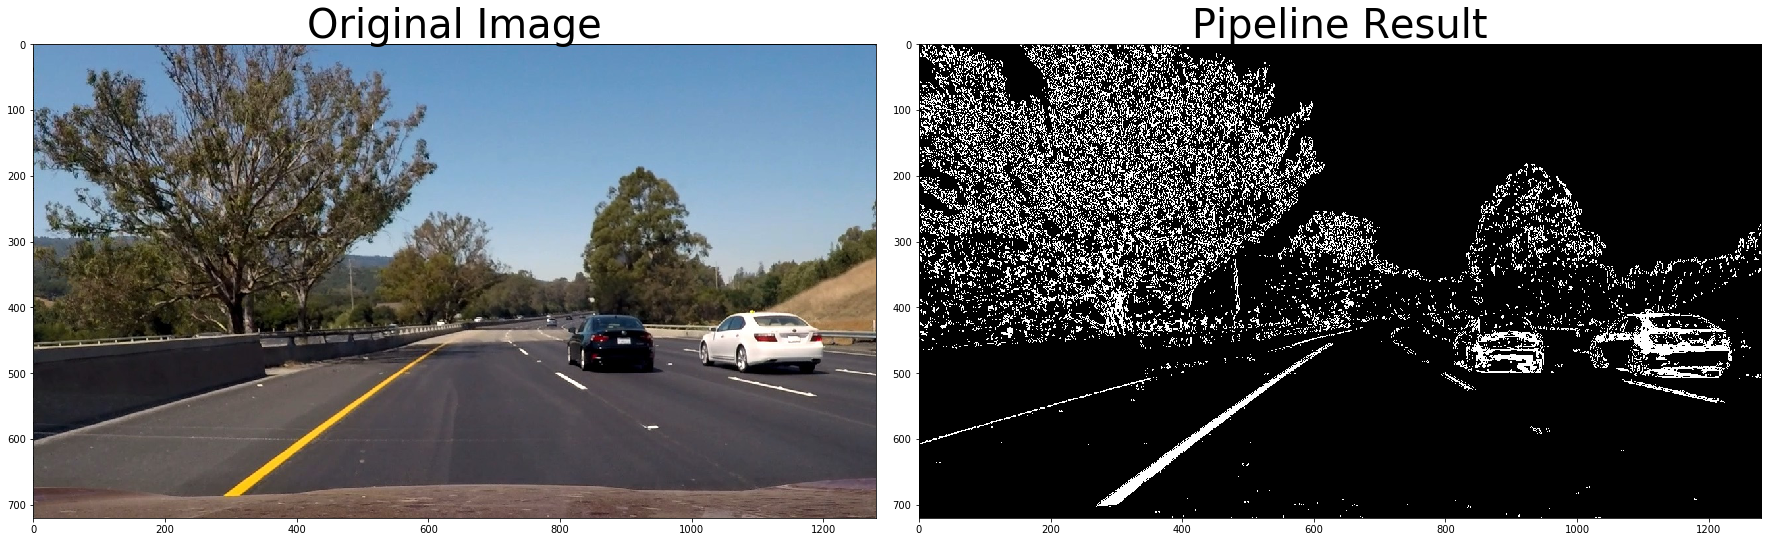

In [37]:
def pipeline(img,s_thresh=(170, 255), sx_thresh=(20, 50)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0)
#     sobelx_abs = np.absolute(sobelx)
    scaled_sobel = np.uint8(255*sobelx_abs/np.max(sobelx_abs))
    
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
  
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return color_binary,combined_binary


mtx,dist = calibrate_camera()  
image = cv2.imread('test_images/test6.jpg')
# image = cv2.imread('camera_cal/calibration1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # opencv and matplotlib use differnt color space, rgb and bgr
dst = cv2.undistort(image, mtx, dist, None, mtx)
result_color, result_bw = pipeline(dst)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
# result_bw.dtype='uint8'
ax1.imshow(image,cmap='gray')
ax1.set_title('Original Image', fontsize=40)
cv2.imwrite('./output_images/threshold_binary_test6.png', result_bw.astype('uint8') * 255)

ax2.imshow(result_bw, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Perspective Transform

(720, 1280, 3)


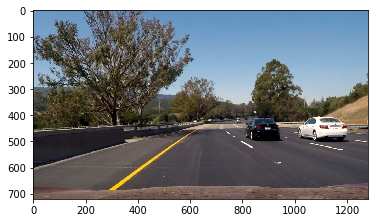

In [4]:
plt.imshow(image)
print(image.shape)

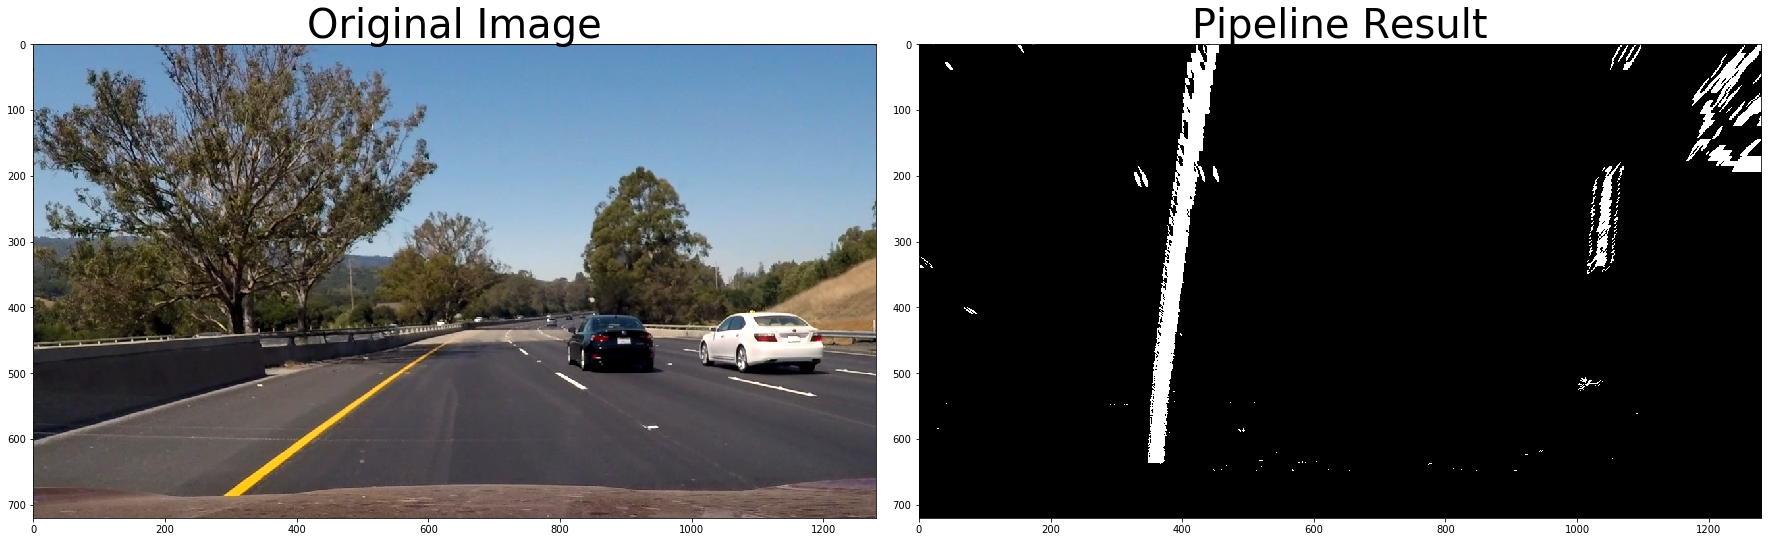

In [61]:
def perspective(img,src,dst):

    img_size = (img.shape[1], img.shape[0])    

    M = cv2.getPerspectiveTransform(src, dst)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size)
    return warped


# image = cv2.imread('test_images/test6.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # opencv and matplotlib use differnt color space, rgb and bgr

# udst = cv2.undistort(image, mtx, dist, None, mtx)
# offset = 100
# src = np.float32([[538, 489], [747, 489],  
#                          [1040, 677], 
#                          [265 , 677]])
# dst = np.float32([[image.shape[1]//4, offset], [3*image.shape[1]//4, offset], 
#                          [3*image.shape[1]//4, image.shape[0] - offset], 
#                          [image.shape[1]//4,  image.shape[0] - offset]])
# _,binary = pipeline(udst)
# binary_warped = perspective(binary,src,dst)


# # Plot the result
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
# f.tight_layout()
# # result_bw.dtype='uint8'
# ax1.imshow(image,cmap='gray')
# ax1.set_title('Original Image', fontsize=40)
# cv2.imwrite('./output_images/perspective_binary_test6.jpg', binary_warped.astype('uint8') * 255)

# ax2.imshow(binary_warped, cmap='gray')
# ax2.set_title('Pipeline Result', fontsize=40)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [6]:

# # Plot the result
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
# f.tight_layout()

# ax1.imshow(img, cmap='gray')
# ax1.set_title('Original Image', fontsize=40)

# ax2.imshow(warped, cmap='gray')
# ax2.set_title('Pipeline Result', fontsize=40)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)




# img = cv2.imread('camera_cal/calibration1.jpg')
# dst = cv2.undistort(img, mtx, dist, None, mtx)
# # Plot the result
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
# f.tight_layout()

# ax1.imshow(img)
# ax1.set_title('Original Image', fontsize=40)

# ax2.imshow(dst)
# ax2.set_title('Pipeline Result', fontsize=40)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
    ## Visualization ##
    # Colors in the left and right lane regions
#     out_img[lefty, leftx] = [255, 0, 0]
#     out_img[righty, rightx] = [0, 0, 255]
#     print(len(right_fitx), len(ploty), out_img)
    
#     for point1, point2 in zip(a, a[1:]): 
#         cv2.line(image, point1, point2, [0, 255, 0], 2) 
    # Plots the left and right polynomials on the lane lines
#     plt.plot(left_fitx, ploty, color='yellow')
#     plt.plot(right_fitx, ploty, color='yellow')

'''  
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    left_y_eval = np.max(lefty) *ym_per_pix
    right_y_eval = np.max(righty) *ym_per_pix
    
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = ((1+(2*left_fit_cr[0]*left_y_eval + left_fit_cr[1])**2)**(3/2))/np.abs(2*left_fit_cr[0])  ## Implement the calculation of the left line here
    right_curverad =  ((1+(2*right_fit_cr[0]*right_y_eval + right_fit_cr[1])**2)**(3/2))/np.abs(2*right_fit_cr[0])   ## Implement the calculation of the right line here
    
    
  
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
 '''   
   
#    
# Run image through the pipeline
# # Note that in your project, you'll also want to feed in the previous fits


# output= fit_polynomial(warped)
# plt.imshow(output, cmap='gray')

# result,lcr,rcr  = search_around_poly(warped)
# print(lcr,rcr)
# # View your output
# # plt.imshow(result)


"  \n    # Define y-value where we want radius of curvature\n    # We'll choose the maximum y-value, corresponding to the bottom of the image\n    left_y_eval = np.max(lefty) *ym_per_pix\n    right_y_eval = np.max(righty) *ym_per_pix\n    \n    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####\n    left_curverad = ((1+(2*left_fit_cr[0]*left_y_eval + left_fit_cr[1])**2)**(3/2))/np.abs(2*left_fit_cr[0])  ## Implement the calculation of the left line here\n    right_curverad =  ((1+(2*right_fit_cr[0]*right_y_eval + right_fit_cr[1])**2)**(3/2))/np.abs(2*right_fit_cr[0])   ## Implement the calculation of the right line here\n    \n    \n  \n    \n    ## Visualization ##\n    # Create an image to draw on and an image to show the selection window\n    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255\n    window_img = np.zeros_like(out_img)\n    # Color in left and right line pixels\n    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds

# Lane Identification(Sliding Window) and polynomial fitting

In [66]:
def find_lane_pixels_plot_base_curve(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
#     plt.plot(histogram)
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
#     print(histogram[midpoint:])
    
    col = leftx_base + (rightx_base-leftx_base)/2
    print("centre of lane = ",col)
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 50
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows) # HxW
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low =  leftx_current - margin # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin # Update this
        win_xright_high = rightx_current + margin   # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]# print("nonzero = ",nonzerox,len(nonzerox))
        good_right_inds2 =  [index for index,(i,j) in enumerate(zip(nonzerox,nonzeroy)) if i >=  win_xright_low and i <  win_xright_high and j >= win_y_low and j < win_y_high]


        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        

        if len(good_left_inds) >= minpix:
            leftx_current = int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) >= minpix:
            rightx_current =int(np.mean(nonzerox[good_right_inds]))
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass
  
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit = np.polyfit(lefty,leftx,2)
    right_fit = np.polyfit(righty,rightx,2)
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    plt.imshow(out_img)
    return leftx, lefty, rightx, righty, out_img ,left_fit, right_fit,col





def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img,left_fit,right_fit,col = find_lane_pixels_plot_base_curve(binary_warped)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ym_per_pix = 16/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

#     plt.plot(left_fitx, ploty, color='yellow')
#     plt.plot(right_fitx, ploty, color='yellow')
    
    y_eval = np.max(ploty) *ym_per_pix
    left_fit_cf, right_fit_cf = poly_rl_coeff(binary_warped.shape, leftx, lefty, rightx, righty,ym_per_pix, xm_per_pix)   
    left_curve_rad = ((1+(2*left_fit_cf[0]*y_eval + left_fit_cf[1])**2)**(3/2))/np.abs(2*left_fit_cf[0])  ## Implement the calculation of the left line here
    right_curve_rad =  ((1+(2*right_fit_cf[0]*y_eval + right_fit_cf[1])**2)**(3/2))/np.abs(2*right_fit_cf[0])   ## Implement the calculation of the right line here
    
    return left_fitx,right_fitx,ploty,out_img,left_fit,right_fit,left_curve_rad,right_curve_rad,col

In [8]:
def poly_rl_coeff(img_shape, leftx, lefty, rightx, righty,ym_per_pix, xm_per_pix):
    ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Generate x and y values for plotting

    return  left_fit_cr, right_fit_cr

In [69]:
def fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty,leftx,2)
    right_fit = np.polyfit(righty,rightx,2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty,left_fit,right_fit



def search_around_poly(binary_warped,left_fit,right_fit):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    margin = 50

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    Y_BASE = binary_warped.shape[0]-1
    leftx_base = left_fit[0]*(Y_BASE)**2 + left_fit[1]*Y_BASE + left_fit[2]
    rightx_base = right_fit[0]*Y_BASE**2 + right_fit[1]*Y_BASE + right_fit[2]
    col=leftx_base + (rightx_base-leftx_base)/2
    print("centre of lane  = ",col)



    left_fitx = left_fit[0]*nonzeroy**2 + left_fit[1]*nonzeroy + left_fit[2]
    right_fitx = right_fit[0]*nonzeroy**2 + right_fit[1]*nonzeroy + right_fit[2]
    
    left_lane_inds = (nonzerox >= left_fitx - margin )&(nonzerox < left_fitx + margin )
    right_lane_inds = ((nonzerox >= right_fitx - margin )&(nonzerox < right_fitx + margin )).nonzero()[0]
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    ym_per_pix = 16/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    left_fitx, right_fitx, ploty,left_fit,right_fit = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)

    y_eval = np.max(ploty) *ym_per_pix
    left_fit_cf, right_fit_cf = poly_rl_coeff(binary_warped.shape, leftx, lefty, rightx, righty,ym_per_pix, xm_per_pix)   
    left_curve_rad = ((1+(2*left_fit_cf[0]*y_eval + left_fit_cf[1])**2)**(3/2))/np.abs(2*left_fit_cf[0])  ## Implement the calculation of the left line here
    right_curve_rad =  ((1+(2*right_fit_cf[0]*y_eval + right_fit_cf[1])**2)**(3/2))/np.abs(2*right_fit_cf[0])   ## Implement the calculation of the right line here
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
 
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    lane_image = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
#     plt.imshow(lane_image)
    return  left_fitx, right_fitx, ploty,lane_image,left_fit,right_fit,left_curve_rad, right_curve_rad,col

In [10]:

def fit_line(left_fitx, right_fitx, ploty,warped):
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image'
    print(color_warp.shape)
    print(warped.shape)
#     plt.imshow(warped)
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    return color_warp
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
   


## Test Images

In [11]:
def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

In [12]:
import os
os.listdir("test_images/")

['test6.jpg',
 'test2.jpg',
 'straight_lines2.jpg',
 'test5.jpg',
 'test1.jpg',
 'straight_lines1.jpg',
 'test4.jpg',
 'test3.jpg']

In [47]:
def process(image):
    offset = 100
    src = np.float32([[538, 489], [747, 489],  
                             [1040, 677], 
                             [265 , 677]])
    dst = np.float32([[image.shape[1]//4, offset], [3*image.shape[1]//4, offset], 
                             [3*image.shape[1]//4, image.shape[0] - offset], 
                             [image.shape[1]//4,  image.shape[0] - offset]])
    image = cv2.undistort(image, mtx, dist, None, mtx)

    _,binary = pipeline(image)
    binary_warped = perspective(binary,src,dst)
    
    
    left_fitx, right_fitx, ploty,lane_region_img,_,_,_,_,_ = fit_polynomial(binary_warped)
#     left_fitx, right_fitx, ploty,lane_region_img,left_fit,right_fit = search_around_poly(binary_warped,left_fit,right_fit)

    color_warp = fit_line(left_fitx, right_fitx, ploty,binary_warped)
    
#     plt.imshow(binary_warped,cmap='gray')
    newwarp = perspective(color_warp,dst,src)
#     newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
#     result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
#     plt.imshow(result)
    
    
    
    return newwarp,lane_region_img

####  lane_pixels&boundary_test_bed

centre of lane =  692.5
(720, 1280, 3)
(720, 1280)


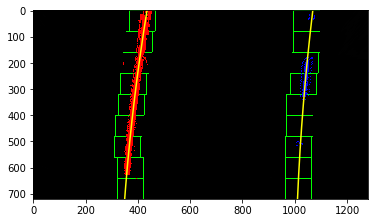

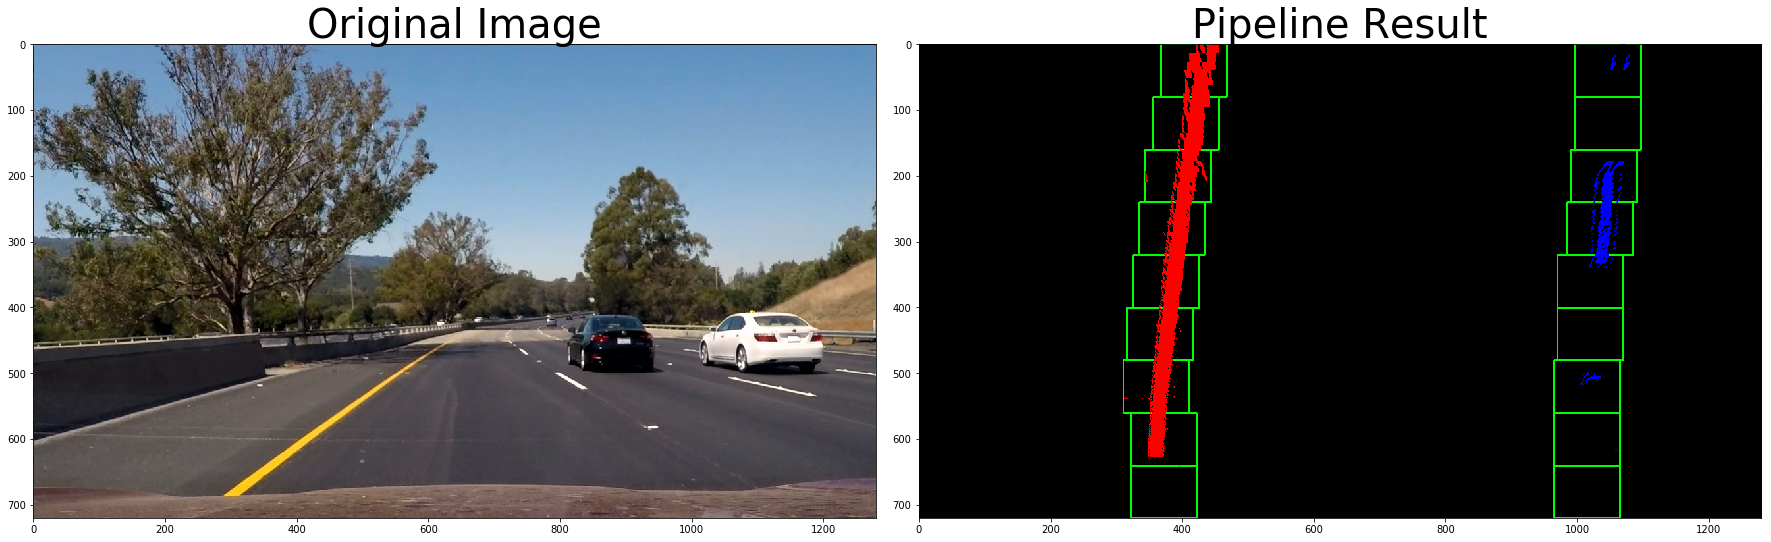

In [64]:
image = cv2.imread('test_images/test6.jpg')
# image = cv2.imread('camera_cal/calibration1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # opencv and matplotlib use differnt color space, rgb and bgr
newwarp,lane_region_img  = process(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
# result_bw.dtype='uint8'
ax1.imshow(image,cmap='gray')
ax1.set_title('Original Image', fontsize=40)
cv2.imwrite('./output_images/lane_pixels&boundary_test6.png', lane_region_img)

ax2.imshow(lane_region_img, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

centre of lane =  643.5
(720, 1280, 3)
(720, 1280)


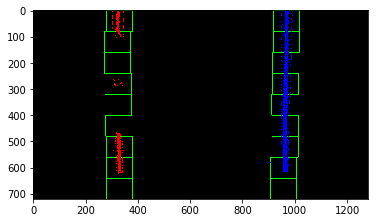

In [14]:
for img in os.listdir("test_images/"):
#     print(img)
#     image = mpimg.imread('test_images/'+img)
    image = mpimg.imread('test_images/test1.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # opencv and matplotlib use differnt color space, rgb and bgr

#     plt.imshow(image)


    newwarp,lane_region_img  = process(image)

    
    result = weighted_img(newwarp, image,1,0.3,0)
#     plt.imshow(result)
#     cv2.waitKey(500)
#     time.sleep(2)
#     plt.imshow(lane_binary)
#     plt.imshow(lane_binary)

    break
#     result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
#     cv2.imwrite('test_images_output/'+img, result)

In [15]:
# Import everything needed to edit/save/watch video clips
! pip install imageio_ffmpeg
from moviepy.editor import VideoFileClip
from IPython.display import HTML

  Running setup.py bdist_wheel for imageio-ffmpeg ... done
  Stored in directory: /root/.cache/pip/wheels/54/ed/2d/4281f5e6a575bfaa7d8f1f4173a7cb635adc406c1f8d87bfc8
Successfully built imageio-ffmpeg


####   centre of curavture and radius TestBed

centre of lane  =  678.159884329
(720, 1280, 3)
(720, 1280)


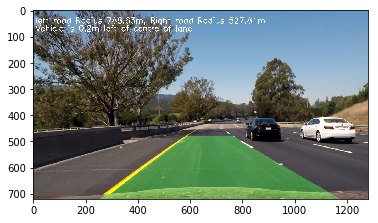

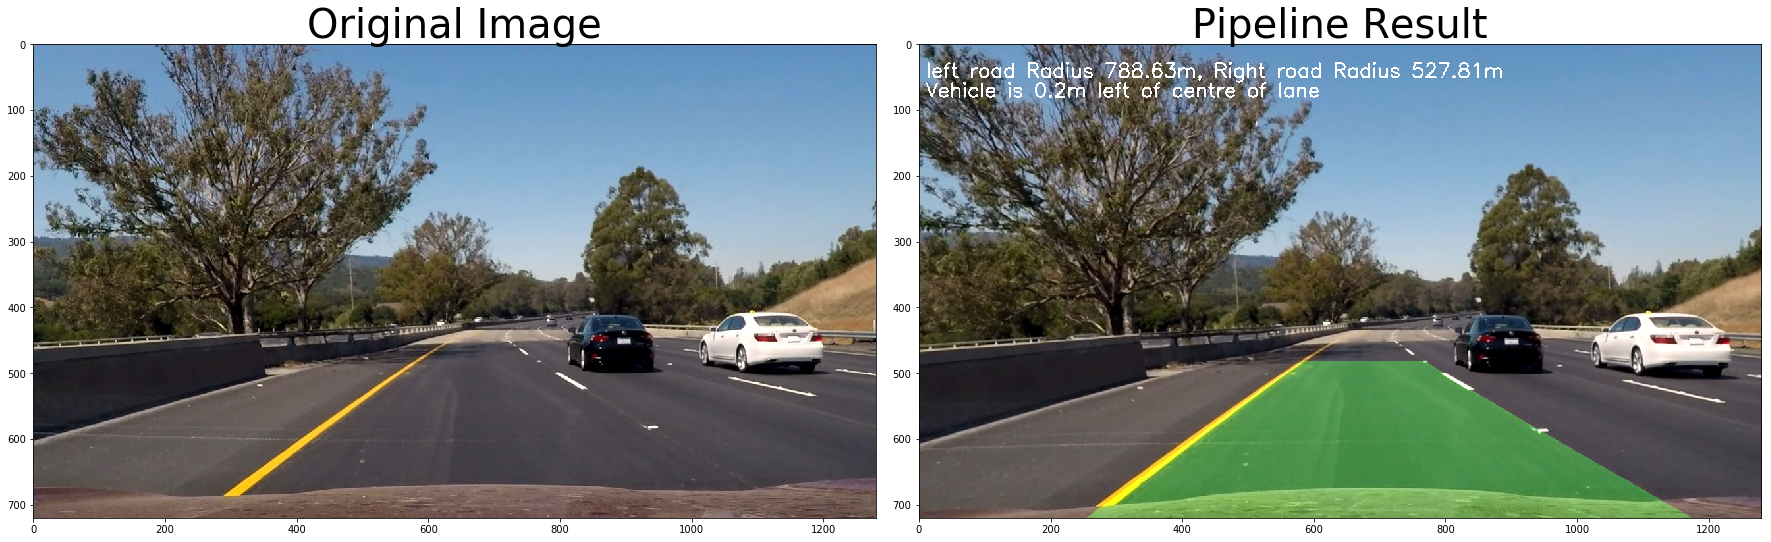

In [75]:
image = cv2.imread('test_images/test6.jpg')
# image = cv2.imread('camera_cal/calibration1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # opencv and matplotlib use differnt color space, rgb and bgr
result  = process2(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
# result_bw.dtype='uint8'
ax1.imshow(image,cmap='gray')
ax1.set_title('Original Image', fontsize=40)
cv2.imwrite('./output_images/lane_boundary_on_original_test6.png', result)

ax2.imshow(result, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [76]:
fast = False
left_fit,right_fit =0,0
def process2(image):
    global fast,left_fit,right_fit

    offset = 100
    src = np.float32([[538, 489], [747, 489],  
                             [1040, 677], 
                             [265 , 677]])
    dst = np.float32([[image.shape[1]//4, offset], [3*image.shape[1]//4, offset], 
                             [3*image.shape[1]//4, image.shape[0] - offset], 
                             [image.shape[1]//4,  image.shape[0] - offset]])
    image = cv2.undistort(image, mtx, dist, None, mtx)

    _,binary = pipeline(image)
    binary_warped = perspective(binary,src,dst)
    
#     left_fit_cr = -1
    if not fast:
        left_fitx, right_fitx, ploty,lane_region_img,left_fit,right_fit,left_fit_cr, right_fit_cr,col = fit_polynomial(binary_warped)
        fast = True
    else:
        left_fitx, right_fitx, ploty,lane_region_img,left_fit,right_fit,left_fit_cr, right_fit_cr,col = search_around_poly(binary_warped,left_fit,right_fit)
        
    color_warp = fit_line(left_fitx, right_fitx, ploty,binary_warped)
    
    
    newwarp = perspective(color_warp,dst,src)
#     newwarp,lane_binary  = process(image)

    font = cv2.FONT_HERSHEY_SIMPLEX
    result = weighted_img(newwarp, image,1,0.3,0)
    
#     if left_fit_cr != -1:
    cv2.putText(result,'left road Radius ' + str(round(left_fit_cr,2)) + "m, Right road Radius "+str(round(right_fit_cr,2))+"m",(10,50), font, 1,(255,255,255),2)
    
    xm_per_pix = 3.7/700
    coi = image.shape[1]/2
    if col > coi :
        cv2.putText(result,'Vehicle is ' + str(round( (col-coi)*xm_per_pix,2)) +'m left of centre of lane',(10,80), font, 1,(255,255,255),2)
    else:
        cv2.putText(result,'Vehicle is ' + str( round((coi-col)*xm_per_pix,2)) +'m right of centre of lane',(10,80), font, 1,(255,255,255),2)           
#     plt.imshow(result)
    return result

centre of lane =  695.0
(720, 1280, 3)
(720, 1280)
[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


  0%|          | 0/1261 [00:00<?, ?it/s]

centre of lane  =  699.148357681


  0%|          | 2/1261 [00:00<02:32,  8.25it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  700.545422394
(720, 1280, 3)
(720, 1280)


  0%|          | 4/1261 [00:00<02:34,  8.15it/s]

centre of lane  =  698.616232852
(720, 1280, 3)
(720, 1280)
centre of lane  =  704.608029061
(720, 1280, 3)
(720, 1280)


  0%|          | 6/1261 [00:00<02:32,  8.22it/s]

centre of lane  =  702.014091964
(720, 1280, 3)
(720, 1280)
centre of lane  =  703.738264629
(720, 1280, 3)
(720, 1280)


  1%|          | 8/1261 [00:00<02:27,  8.48it/s]

centre of lane  =  705.55958101
(720, 1280, 3)
(720, 1280)
centre of lane  =  706.374242239
(720, 1280, 3)
(720, 1280)


  1%|          | 10/1261 [00:01<02:28,  8.42it/s]

centre of lane  =  707.125341732
(720, 1280, 3)
(720, 1280)
centre of lane  =  698.27729599
(720, 1280, 3)
(720, 1280)


  1%|          | 12/1261 [00:01<02:28,  8.43it/s]

centre of lane  =  702.230710119
(720, 1280, 3)
(720, 1280)
centre of lane  =  707.397327059
(720, 1280, 3)
(720, 1280)


  1%|          | 14/1261 [00:01<02:28,  8.38it/s]

centre of lane  =  710.225940962
(720, 1280, 3)
(720, 1280)
centre of lane  =  703.830436277
(720, 1280, 3)
(720, 1280)


  1%|▏         | 16/1261 [00:01<02:30,  8.30it/s]

centre of lane  =  703.371646393
(720, 1280, 3)
(720, 1280)
centre of lane  =  705.961603401
(720, 1280, 3)
(720, 1280)


  1%|▏         | 18/1261 [00:02<02:29,  8.32it/s]

centre of lane  =  709.556101134
(720, 1280, 3)
(720, 1280)
centre of lane  =  706.70580435
(720, 1280, 3)
(720, 1280)


  2%|▏         | 20/1261 [00:02<02:33,  8.08it/s]

centre of lane  =  707.10116299
(720, 1280, 3)
(720, 1280)
centre of lane  =  709.368100414
(720, 1280, 3)
(720, 1280)


  2%|▏         | 22/1261 [00:02<02:27,  8.37it/s]

centre of lane  =  709.331736184
(720, 1280, 3)
(720, 1280)
centre of lane  =  715.470793896
(720, 1280, 3)
(720, 1280)


  2%|▏         | 24/1261 [00:02<02:26,  8.44it/s]

centre of lane  =  701.493545784
(720, 1280, 3)
(720, 1280)
centre of lane  =  702.526334686
(720, 1280, 3)
(720, 1280)


  2%|▏         | 26/1261 [00:03<02:29,  8.26it/s]

centre of lane  =  703.191890333
(720, 1280, 3)
(720, 1280)
centre of lane  =  699.797148735
(720, 1280, 3)
(720, 1280)


  2%|▏         | 28/1261 [00:03<02:26,  8.41it/s]

centre of lane  =  696.893726116
(720, 1280, 3)
(720, 1280)
centre of lane  =  695.489257695
(720, 1280, 3)
(720, 1280)


  2%|▏         | 30/1261 [00:03<02:31,  8.13it/s]

centre of lane  =  691.937254448
(720, 1280, 3)
(720, 1280)
centre of lane  =  697.405375533
(720, 1280, 3)
(720, 1280)


  3%|▎         | 32/1261 [00:03<02:26,  8.40it/s]

centre of lane  =  695.613007187
(720, 1280, 3)
(720, 1280)
centre of lane  =  694.803184859
(720, 1280, 3)
(720, 1280)


  3%|▎         | 34/1261 [00:04<02:23,  8.53it/s]

centre of lane  =  693.562518905
(720, 1280, 3)
(720, 1280)
centre of lane  =  694.385563897
(720, 1280, 3)
(720, 1280)


  3%|▎         | 36/1261 [00:04<02:25,  8.43it/s]

centre of lane  =  687.672764443
(720, 1280, 3)
(720, 1280)
centre of lane  =  687.154562916
(720, 1280, 3)
(720, 1280)


  3%|▎         | 38/1261 [00:04<02:23,  8.55it/s]

centre of lane  =  691.88639309
(720, 1280, 3)
(720, 1280)
centre of lane  =  692.682174361
(720, 1280, 3)
(720, 1280)


  3%|▎         | 40/1261 [00:04<02:22,  8.59it/s]

centre of lane  =  680.27787485
(720, 1280, 3)
(720, 1280)
centre of lane  =  692.030508977
(720, 1280, 3)
(720, 1280)


  3%|▎         | 42/1261 [00:05<02:23,  8.47it/s]

centre of lane  =  696.538428655
(720, 1280, 3)
(720, 1280)
centre of lane  =  698.51559934
(720, 1280, 3)
(720, 1280)
centre of lane  =  696.998736934
(720, 1280, 3)
(720, 1280)


  3%|▎         | 44/1261 [00:05<05:27,  3.72it/s]

centre of lane  =  699.161687205
(720, 1280, 3)
(720, 1280)


  4%|▎         | 45/1261 [00:06<05:49,  3.48it/s]

centre of lane  =  698.908708088
(720, 1280, 3)
(720, 1280)


  4%|▎         | 46/1261 [00:06<06:03,  3.34it/s]

centre of lane  =  698.816490388
(720, 1280, 3)
(720, 1280)


  4%|▎         | 47/1261 [00:06<05:54,  3.43it/s]

centre of lane  =  695.32047257
(720, 1280, 3)
(720, 1280)


  4%|▍         | 48/1261 [00:07<05:57,  3.39it/s]

centre of lane  =  685.116731562
(720, 1280, 3)
(720, 1280)


  4%|▍         | 49/1261 [00:07<05:47,  3.49it/s]

centre of lane  =  686.146464182
(720, 1280, 3)
(720, 1280)


  4%|▍         | 50/1261 [00:07<05:48,  3.47it/s]

centre of lane  =  694.039043584
(720, 1280, 3)
(720, 1280)


  4%|▍         | 51/1261 [00:08<05:59,  3.37it/s]

centre of lane  =  695.381997007
(720, 1280, 3)
(720, 1280)


  4%|▍         | 52/1261 [00:08<05:46,  3.49it/s]

centre of lane  =  683.609955305
(720, 1280, 3)
(720, 1280)


  4%|▍         | 53/1261 [00:08<05:55,  3.39it/s]

centre of lane  =  688.685049741
(720, 1280, 3)
(720, 1280)


  4%|▍         | 54/1261 [00:08<05:44,  3.51it/s]

centre of lane  =  697.912249531
(720, 1280, 3)
(720, 1280)


  4%|▍         | 55/1261 [00:09<05:58,  3.37it/s]

centre of lane  =  697.514183416
(720, 1280, 3)
(720, 1280)


  4%|▍         | 56/1261 [00:09<05:32,  3.62it/s]

centre of lane  =  698.370889499
(720, 1280, 3)
(720, 1280)


  5%|▍         | 57/1261 [00:09<05:41,  3.53it/s]

centre of lane  =  699.902997534
(720, 1280, 3)
(720, 1280)
centre of lane  =  700.145612467
(720, 1280, 3)
(720, 1280)


  5%|▍         | 59/1261 [00:10<06:15,  3.20it/s]

centre of lane  =  697.433434504
(720, 1280, 3)
(720, 1280)


  5%|▍         | 60/1261 [00:10<06:21,  3.15it/s]

centre of lane  =  682.286190058
(720, 1280, 3)
(720, 1280)


  5%|▍         | 61/1261 [00:11<06:05,  3.29it/s]

centre of lane  =  697.569735454
(720, 1280, 3)
(720, 1280)


  5%|▍         | 62/1261 [00:11<06:06,  3.27it/s]

centre of lane  =  695.645728461
(720, 1280, 3)
(720, 1280)


  5%|▍         | 63/1261 [00:11<05:55,  3.37it/s]

centre of lane  =  698.455321416
(720, 1280, 3)
(720, 1280)


  5%|▌         | 64/1261 [00:11<06:00,  3.32it/s]

centre of lane  =  677.143462934
(720, 1280, 3)
(720, 1280)


  5%|▌         | 65/1261 [00:12<05:52,  3.39it/s]

centre of lane  =  687.723502354
(720, 1280, 3)
(720, 1280)


  5%|▌         | 66/1261 [00:12<05:40,  3.51it/s]

centre of lane  =  690.153265268
(720, 1280, 3)
(720, 1280)


  5%|▌         | 67/1261 [00:12<05:19,  3.74it/s]

centre of lane  =  690.918424417
(720, 1280, 3)
(720, 1280)


  5%|▌         | 68/1261 [00:12<05:02,  3.94it/s]

centre of lane  =  691.043452539
(720, 1280, 3)
(720, 1280)


  5%|▌         | 69/1261 [00:13<04:54,  4.05it/s]

centre of lane  =  690.41222356
(720, 1280, 3)
(720, 1280)


  6%|▌         | 70/1261 [00:13<04:37,  4.29it/s]

centre of lane  =  686.42296387
(720, 1280, 3)
(720, 1280)
centre of lane  =  684.177574076


  6%|▌         | 71/1261 [00:13<04:33,  4.35it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.247810025


  6%|▌         | 72/1261 [00:13<04:29,  4.41it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.920878605


  6%|▌         | 73/1261 [00:14<04:32,  4.36it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  680.018675796


  6%|▌         | 74/1261 [00:14<04:30,  4.39it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  680.839849513


  6%|▌         | 75/1261 [00:14<04:31,  4.37it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  676.631491313


  6%|▌         | 76/1261 [00:14<04:18,  4.58it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  662.941902611


  6%|▌         | 77/1261 [00:14<04:24,  4.48it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.231938571


  6%|▌         | 78/1261 [00:15<04:14,  4.64it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.075754535


  6%|▋         | 79/1261 [00:15<04:20,  4.54it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  680.478986477


  6%|▋         | 80/1261 [00:15<04:07,  4.77it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  680.376797048
(720, 1280, 3)

  6%|▋         | 81/1261 [00:15<04:12,  4.67it/s]


(720, 1280)
centre of lane  =  679.918586798


  7%|▋         | 82/1261 [00:15<04:02,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  677.486659776
(720, 1280, 3)
(720, 1280)


  7%|▋         | 84/1261 [00:16<03:58,  4.94it/s]

centre of lane  =  675.524694953
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.42139048


  7%|▋         | 85/1261 [00:16<04:03,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.492752086


  7%|▋         | 86/1261 [00:16<03:58,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.10378664
(720, 1280, 3)
(720, 1280)


  7%|▋         | 88/1261 [00:17<03:55,  4.97it/s]

centre of lane  =  671.390632375
(720, 1280, 3)
(720, 1280)
centre of lane  =  663.907907377


  7%|▋         | 89/1261 [00:17<04:01,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  662.193430625


  7%|▋         | 90/1261 [00:17<03:55,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.79997323
(720, 1280, 3)
(720, 1280)


  7%|▋         | 92/1261 [00:17<03:52,  5.02it/s]

centre of lane  =  672.961685598
(720, 1280, 3)
(720, 1280)
centre of lane  =  671.246026935


  7%|▋         | 93/1261 [00:18<03:58,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.823687061


  7%|▋         | 94/1261 [00:18<04:12,  4.63it/s]

(720, 1280, 3)
(720, 1280)


  8%|▊         | 95/1261 [00:18<04:02,  4.82it/s]

centre of lane  =  672.263066844
(720, 1280, 3)
(720, 1280)
centre of lane  =  673.411421437


  8%|▊         | 96/1261 [00:18<04:04,  4.76it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  682.238761979


  8%|▊         | 97/1261 [00:19<04:06,  4.72it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  659.53256102


  8%|▊         | 98/1261 [00:19<04:05,  4.75it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.688374698


  8%|▊         | 99/1261 [00:19<04:08,  4.68it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.164797607


  8%|▊         | 100/1261 [00:19<04:05,  4.72it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  670.062500918


  8%|▊         | 101/1261 [00:19<04:05,  4.72it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.654059874


  8%|▊         | 102/1261 [00:20<04:02,  4.77it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  663.813962253


  8%|▊         | 103/1261 [00:20<04:07,  4.69it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.707916186


  8%|▊         | 104/1261 [00:20<04:06,  4.69it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.865024517


  8%|▊         | 105/1261 [00:20<04:06,  4.68it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.61677928
(720, 1280, 3)
(720, 1280)


  8%|▊         | 107/1261 [00:21<03:57,  4.85it/s]

centre of lane  =  674.406709722
(720, 1280, 3)
(720, 1280)


  9%|▊         | 108/1261 [00:21<04:00,  4.80it/s]

centre of lane  =  677.185679518
(720, 1280, 3)
(720, 1280)


  9%|▊         | 109/1261 [00:21<03:49,  5.02it/s]

centre of lane  =  677.261637916
(720, 1280, 3)
(720, 1280)
centre of lane  =  682.389964104


  9%|▊         | 110/1261 [00:21<03:54,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  685.150775743
(720, 1280, 3)
(720, 1280)


  9%|▉         | 112/1261 [00:22<03:52,  4.94it/s]

centre of lane  =  685.279872058
(720, 1280, 3)
(720, 1280)


  9%|▉         | 113/1261 [00:22<03:46,  5.08it/s]

centre of lane  =  684.165444745
(720, 1280, 3)
(720, 1280)
centre of lane  =  683.615842308


  9%|▉         | 114/1261 [00:22<03:55,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  689.826455802
(720, 1280, 3)
(720, 1280)


  9%|▉         | 116/1261 [00:22<03:49,  4.98it/s]

centre of lane  =  676.925099519
(720, 1280, 3)
(720, 1280)


  9%|▉         | 117/1261 [00:23<03:43,  5.11it/s]

centre of lane  =  681.257530197
(720, 1280, 3)
(720, 1280)
centre of lane  =  683.436580802


  9%|▉         | 118/1261 [00:23<03:49,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  684.309251639
(720, 1280, 3)
(720, 1280)


 10%|▉         | 120/1261 [00:23<03:44,  5.08it/s]

centre of lane  =  684.931366261
(720, 1280, 3)
(720, 1280)
centre of lane  =  686.077775532


 10%|▉         | 121/1261 [00:23<04:06,  4.63it/s]

(720, 1280, 3)
(720, 1280)


 10%|▉         | 122/1261 [00:24<04:02,  4.70it/s]

centre of lane  =  685.924319078
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 10%|▉         | 123/1261 [00:24<04:01,  4.72it/s]

 676.491929162
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 10%|▉         | 124/1261 [00:24<03:48,  4.97it/s]

 687.209760965
(720, 1280, 3)
(720, 1280)
centre of lane  =  687.067839948


 10%|▉         | 125/1261 [00:24<03:48,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  689.219429104
(720, 1280, 3)

 10%|▉         | 126/1261 [00:24<03:48,  4.96it/s]


(720, 1280)
centre of lane  =  687.098797459
(720, 1280, 3)
(720, 1280)


 10%|█         | 128/1261 [00:25<03:46,  5.00it/s]

centre of lane  =  685.713505247
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 10%|█         | 129/1261 [00:25<03:47,  4.97it/s]

 691.959060514
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 10%|█         | 130/1261 [00:25<03:47,  4.97it/s]

 695.21968868
(720, 1280, 3)
(720, 1280)
centre of lane  =  

 10%|█         | 131/1261 [00:25<03:47,  4.96it/s]

694.889661173
(720, 1280, 3)
(720, 1280)


 10%|█         | 132/1261 [00:26<03:54,  4.81it/s]

centre of lane  =  696.872786791
(720, 1280, 3)
(720, 1280)


 11%|█         | 133/1261 [00:26<03:48,  4.94it/s]

centre of lane  =  697.587271932
(720, 1280, 3)
(720, 1280)
centre of lane  =  698.563734973


 11%|█         | 134/1261 [00:26<03:55,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  682.267226931


 11%|█         | 135/1261 [00:26<03:55,  4.77it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  685.531139447
(720, 1280, 3)
(720, 1280)


 11%|█         | 137/1261 [00:27<03:49,  4.89it/s]

centre of lane  =  689.908900518
(720, 1280, 3)
(720, 1280)


 11%|█         | 138/1261 [00:27<03:39,  5.11it/s]

centre of lane  =  693.163277169
(720, 1280, 3)
(720, 1280)
centre of lane  =  695.988195544


 11%|█         | 139/1261 [00:27<03:44,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  690.634801521
(720, 1280, 3)
(720, 1280)


 11%|█         | 141/1261 [00:27<03:40,  5.09it/s]

centre of lane  =  689.539017065
(720, 1280, 3)
(720, 1280)
centre of lane  =  699.018243392


 11%|█▏        | 142/1261 [00:28<03:43,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  702.538916469


 11%|█▏        | 143/1261 [00:28<03:43,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  701.433606025
(720, 1280, 3)


 11%|█▏        | 144/1261 [00:28<03:43,  5.00it/s]

(720, 1280)
centre of lane  =  700.254975617
(720, 1280, 3)
(720, 1280)


 12%|█▏        | 146/1261 [00:29<03:44,  4.96it/s]

centre of lane  =  701.40821999
(720, 1280, 3)
(720, 1280)
centre of lane  =  696.727104966


 12%|█▏        | 147/1261 [00:29<03:46,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  680.704527574
(720, 1280, 3)
(720, 1280)


 12%|█▏        | 149/1261 [00:29<03:48,  4.86it/s]

centre of lane  =  692.775759424
(720, 1280, 3)
(720, 1280)


 12%|█▏        | 150/1261 [00:29<03:43,  4.98it/s]

centre of lane  =  698.180790488
(720, 1280, 3)
(720, 1280)
centre of lane  =  692.076326136
(720, 1280, 3)
(720, 1280)


 12%|█▏        | 151/1261 [00:30<03:46,  4.91it/s]

centre of lane  =  689.119597565
(720, 1280, 3)
(720, 1280)


 12%|█▏        | 153/1261 [00:30<03:38,  5.06it/s]

centre of lane  =  696.772503942
(720, 1280, 3)
(720, 1280)
centre of lane  =  700.462762653

 12%|█▏        | 154/1261 [00:30<03:32,  5.21it/s]


(720, 1280, 3)
(720, 1280)
centre of lane  =  704.559404186
(720, 1280, 3)

 12%|█▏        | 155/1261 [00:30<03:36,  5.11it/s]


(720, 1280)
centre of lane  =  700.083398512
(720, 1280, 3)
(720, 1280)


 12%|█▏        | 157/1261 [00:31<03:31,  5.21it/s]

centre of lane  =  701.528591048
(720, 1280, 3)
(720, 1280)
centre of lane  =  697.305133635


 13%|█▎        | 158/1261 [00:31<04:06,  4.47it/s]

(720, 1280, 3)
(720, 1280)


 13%|█▎        | 159/1261 [00:31<03:54,  4.69it/s]

centre of lane  =  694.700488971
(720, 1280, 3)
(720, 1280)
centre of lane  =  685.344832996


 13%|█▎        | 160/1261 [00:31<03:58,  4.61it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.834246914
(720, 1280, 3)
(720, 1280)


 13%|█▎        | 162/1261 [00:32<03:46,  4.85it/s]

centre of lane  =  686.172702768
(720, 1280, 3)
(720, 1280)


 13%|█▎        | 163/1261 [00:32<03:47,  4.82it/s]

centre of lane  =  683.512167103
(720, 1280, 3)
(720, 1280)


 13%|█▎        | 164/1261 [00:32<03:45,  4.86it/s]

centre of lane  =  681.182407071
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 13%|█▎        | 165/1261 [00:32<03:47,  4.81it/s]

 677.827823442
(720, 1280, 3)
(720, 1280)


 13%|█▎        | 166/1261 [00:33<03:39,  4.99it/s]

centre of lane  =  693.022594313
(720, 1280, 3)
(720, 1280)
centre of lane  =  695.13953849


 13%|█▎        | 167/1261 [00:33<03:44,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  691.567925345
(720, 1280, 3)
(720, 1280)


 13%|█▎        | 169/1261 [00:33<03:41,  4.93it/s]

centre of lane  =  693.301334935
(720, 1280, 3)
(720, 1280)


 13%|█▎        | 170/1261 [00:33<03:32,  5.13it/s]

centre of lane  =  694.54562059
(720, 1280, 3)
(720, 1280)
centre of lane  =  690.451476522
(720, 1280, 3)
(720, 1280)


 14%|█▎        | 172/1261 [00:34<03:28,  5.23it/s]

centre of lane  =  686.843399743
(720, 1280, 3)
(720, 1280)
centre of lane  =  667.753106134
(720, 1280, 3)

 14%|█▎        | 173/1261 [00:34<03:35,  5.04it/s]


(720, 1280)
centre of lane  =  671.159241149
(720, 1280, 3)

 14%|█▍        | 174/1261 [00:34<03:29,  5.18it/s]


(720, 1280)
centre of lane  =  671.207608929
(720, 1280, 3)
(720, 1280)


 14%|█▍        | 176/1261 [00:35<03:27,  5.24it/s]

centre of lane  =  675.192736264
(720, 1280, 3)
(720, 1280)
centre of lane  =  669.38610544


 14%|█▍        | 177/1261 [00:35<03:33,  5.07it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.08876296
(720, 1280, 3)
(720, 1280)


 14%|█▍        | 179/1261 [00:35<03:30,  5.15it/s]

centre of lane  =  678.371219556
(720, 1280, 3)
(720, 1280)


 14%|█▍        | 180/1261 [00:35<03:33,  5.06it/s]

centre of lane  =  681.674953563
(720, 1280, 3)
(720, 1280)
centre of lane  =  680.706119222


 14%|█▍        | 181/1261 [00:36<03:36,  5.00it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  683.501865335
(720, 1280, 3)
(720, 1280)


 15%|█▍        | 183/1261 [00:36<03:29,  5.14it/s]

centre of lane  =  681.120265536
(720, 1280, 3)
(720, 1280)
centre of lane  =  682.872130948


 15%|█▍        | 184/1261 [00:36<03:32,  5.07it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  669.816004422
(720, 1280, 3)

 15%|█▍        | 185/1261 [00:36<03:35,  4.99it/s]


(720, 1280)
centre of lane  =  679.393192181


 15%|█▍        | 186/1261 [00:37<03:38,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.53983138
(720, 1280, 3)
(720, 1280)


 15%|█▍        | 188/1261 [00:37<03:31,  5.08it/s]

centre of lane  =  669.16887465
(720, 1280, 3)
(720, 1280)
centre of lane  =  

 15%|█▍        | 189/1261 [00:37<03:34,  5.01it/s]

676.789094489
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 15%|█▌        | 190/1261 [00:37<03:28,  5.15it/s]

 674.832476342
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.954805567


 15%|█▌        | 191/1261 [00:37<03:32,  5.04it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.207948184


 15%|█▌        | 192/1261 [00:38<03:32,  5.03it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  688.829654529


 15%|█▌        | 193/1261 [00:38<03:38,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  690.30618169


 15%|█▌        | 194/1261 [00:38<03:41,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  690.944931064
(720, 1280, 3)

 15%|█▌        | 195/1261 [00:38<03:42,  4.80it/s]


(720, 1280)
centre of lane  =  691.642937578


 16%|█▌        | 196/1261 [00:39<03:34,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  684.684964193
(720, 1280, 3)
(720, 1280)


 16%|█▌        | 198/1261 [00:39<03:32,  5.00it/s]

centre of lane  =  684.424820324
(720, 1280, 3)
(720, 1280)
centre of lane  =  683.942158377


 16%|█▌        | 199/1261 [00:39<03:37,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  685.439868336
(720, 1280, 3)
(720, 1280)


 16%|█▌        | 201/1261 [00:40<03:28,  5.07it/s]

centre of lane  =  687.28725317
(720, 1280, 3)
(720, 1280)
centre of lane  =  

 16%|█▌        | 202/1261 [00:40<03:33,  4.97it/s]

689.146261631
(720, 1280, 3)
(720, 1280)


 16%|█▌        | 203/1261 [00:40<03:25,  5.15it/s]

centre of lane  =  684.093892374
(720, 1280, 3)
(720, 1280)
centre of lane  =  686.665736971


 16%|█▌        | 204/1261 [00:40<03:30,  5.02it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  685.232115386
(720, 1280, 3)
(720, 1280)


 16%|█▋        | 206/1261 [00:40<03:28,  5.07it/s]

centre of lane  =  684.700556626
(720, 1280, 3)
(720, 1280)


 16%|█▋        | 207/1261 [00:41<03:22,  5.21it/s]

centre of lane  =  687.072340576
(720, 1280, 3)
(720, 1280)
centre of lane  =  686.452790384
(720, 1280, 3)

 16%|█▋        | 208/1261 [00:41<03:28,  5.04it/s]


(720, 1280)
centre of lane  =  662.479153143


 17%|█▋        | 209/1261 [00:41<03:23,  5.16it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.617466401
(720, 1280, 3)
(720, 1280)


 17%|█▋        | 211/1261 [00:41<03:23,  5.16it/s]

centre of lane  =  675.002074894
(720, 1280, 3)
(720, 1280)
centre of lane  =  673.855104857


 17%|█▋        | 212/1261 [00:42<03:29,  5.00it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.311476233
(720, 1280, 3)
(720, 1280)


 17%|█▋        | 214/1261 [00:42<03:26,  5.07it/s]

centre of lane  =  668.778808591
(720, 1280, 3)
(720, 1280)


 17%|█▋        | 215/1261 [00:42<03:19,  5.24it/s]

centre of lane  =  678.975653734
(720, 1280, 3)
(720, 1280)
centre of lane  =  684.488805736
(720, 1280, 3)

 17%|█▋        | 216/1261 [00:42<03:25,  5.09it/s]


(720, 1280)
centre of lane  =  682.610658962
(720, 1280, 3)

 17%|█▋        | 217/1261 [00:43<03:20,  5.20it/s]


(720, 1280)
centre of lane  =  680.813552089
(720, 1280, 3)
(720, 1280)


 17%|█▋        | 219/1261 [00:43<03:18,  5.25it/s]

centre of lane  =  680.19877803
(720, 1280, 3)
(720, 1280)
centre of lane  =  679.253597677


 17%|█▋        | 220/1261 [00:43<03:23,  5.13it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  676.869398934
(720, 1280, 3)

 18%|█▊        | 221/1261 [00:43<03:26,  5.03it/s]


(720, 1280)
centre of lane  =  661.79315386
(720, 1280, 3)
(720, 1280)


 18%|█▊        | 223/1261 [00:44<03:26,  5.03it/s]

centre of lane  =  662.829251785
(720, 1280, 3)
(720, 1280)


 18%|█▊        | 224/1261 [00:44<03:28,  4.97it/s]

centre of lane  =  667.558393481
(720, 1280, 3)
(720, 1280)
centre of lane  =  670.537870928


 18%|█▊        | 225/1261 [00:44<03:26,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.760927764
(720, 1280, 3)
(720, 1280)


 18%|█▊        | 227/1261 [00:45<03:28,  4.95it/s]

centre of lane  =  668.322920765
(720, 1280, 3)
(720, 1280)
centre of lane  =  

 18%|█▊        | 228/1261 [00:45<03:18,  5.19it/s]

674.61505284
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.667744541


 18%|█▊        | 229/1261 [00:45<03:25,  5.02it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  677.428934074
(720, 1280, 3)
(720, 1280)


 18%|█▊        | 231/1261 [00:45<03:23,  5.05it/s]

centre of lane  =  674.300891533
(720, 1280, 3)
(720, 1280)


 18%|█▊        | 232/1261 [00:46<03:17,  5.21it/s]

centre of lane  =  674.670155981
(720, 1280, 3)
(720, 1280)
centre of lane  =  670.166856429


 18%|█▊        | 233/1261 [00:46<03:25,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  657.724832194


 19%|█▊        | 234/1261 [00:46<03:19,  5.14it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  657.125628651
(720, 1280, 3)
(720, 1280)


 19%|█▊        | 236/1261 [00:46<03:16,  5.22it/s]

centre of lane  =  658.653351015
(720, 1280, 3)
(720, 1280)
centre of lane  =  662.580910591
(720, 1280, 3)

 19%|█▉        | 237/1261 [00:47<03:20,  5.11it/s]


(720, 1280)
centre of lane  =  659.10303756
(720, 1280, 3)
(720, 1280)


 19%|█▉        | 239/1261 [00:47<03:20,  5.11it/s]

centre of lane  =  657.23008965
(720, 1280, 3)
(720, 1280)


 19%|█▉        | 240/1261 [00:47<03:17,  5.17it/s]

centre of lane  =  659.086809282
(720, 1280, 3)
(720, 1280)
centre of lane  =  665.489455464


 19%|█▉        | 241/1261 [00:47<03:22,  5.04it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.385114381


 19%|█▉        | 242/1261 [00:48<03:27,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.669243742
(720, 1280, 3)
(720, 1280)


 19%|█▉        | 244/1261 [00:48<03:24,  4.98it/s]

centre of lane  =  659.356521026
(720, 1280, 3)
(720, 1280)


 19%|█▉        | 245/1261 [00:48<03:17,  5.14it/s]

centre of lane  =  657.513661539
(720, 1280, 3)
(720, 1280)
centre of lane  =  644.731653973


 20%|█▉        | 246/1261 [00:48<03:21,  5.04it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  651.100947071
(720, 1280, 3)
(720, 1280)


 20%|█▉        | 248/1261 [00:49<03:20,  5.05it/s]

centre of lane  =  646.428998137
(720, 1280, 3)
(720, 1280)


 20%|█▉        | 249/1261 [00:49<03:16,  5.16it/s]

centre of lane  =  648.673975385
(720, 1280, 3)
(720, 1280)
centre of lane  =  635.702977148


 20%|█▉        | 250/1261 [00:49<03:24,  4.94it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  629.916097349


 20%|█▉        | 251/1261 [00:49<03:18,  5.10it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  644.581681158
(720, 1280, 3)
(720, 1280)


 20%|██        | 253/1261 [00:50<03:19,  5.04it/s]

centre of lane  =  652.746400751
(720, 1280, 3)
(720, 1280)
centre of lane  =  652.081070678


 20%|██        | 254/1261 [00:50<03:21,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.838781054


 20%|██        | 255/1261 [00:50<03:23,  4.94it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  655.717138205
(720, 1280, 3)
(720, 1280)


 20%|██        | 257/1261 [00:51<03:20,  5.00it/s]

centre of lane  =  654.150665583
(720, 1280, 3)
(720, 1280)


 20%|██        | 258/1261 [00:51<03:15,  5.13it/s]

centre of lane  =  623.711007657
(720, 1280, 3)
(720, 1280)
centre of lane  =  632.779670971


 21%|██        | 259/1261 [00:51<03:22,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  627.986324577


 21%|██        | 260/1261 [00:51<03:16,  5.11it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  634.367616822
(720, 1280, 3)
(720, 1280)


 21%|██        | 262/1261 [00:52<03:16,  5.10it/s]

centre of lane  =  641.457702187
(720, 1280, 3)
(720, 1280)
centre of lane  =  638.699491801


 21%|██        | 263/1261 [00:52<03:22,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  656.344376596


 21%|██        | 264/1261 [00:52<03:15,  5.09it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  658.764610382
(720, 1280, 3)
(720, 1280)


 21%|██        | 266/1261 [00:52<03:17,  5.04it/s]

centre of lane  =  655.681578666
(720, 1280, 3)
(720, 1280)
centre of lane  =  656.653251225


 21%|██        | 267/1261 [00:53<03:22,  4.91it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  657.594508283
(720, 1280, 3)
(720, 1280)

 21%|██▏       | 268/1261 [00:53<03:15,  5.08it/s]


centre of lane  =  657.103412881
(720, 1280, 3)
(720, 1280)


 21%|██▏       | 270/1261 [00:53<03:16,  5.05it/s]

centre of lane  =  656.030603949
(720, 1280, 3)
(720, 1280)
centre of lane  =  631.180455851


 21%|██▏       | 271/1261 [00:53<03:19,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  638.420138373
(720, 1280, 3)

 22%|██▏       | 272/1261 [00:54<03:24,  4.84it/s]


(720, 1280)
centre of lane  =  645.688652284


 22%|██▏       | 273/1261 [00:54<03:17,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  647.06926475
(720, 1280, 3)
(720, 1280)


 22%|██▏       | 275/1261 [00:54<03:13,  5.09it/s]

centre of lane  =  652.920212217
(720, 1280, 3)
(720, 1280)
centre of lane  =  656.03719074


 22%|██▏       | 276/1261 [00:54<03:16,  5.00it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.901624854
(720, 1280, 3)
(720, 1280)


 22%|██▏       | 278/1261 [00:55<03:13,  5.09it/s]

centre of lane  =  664.240710266
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 22%|██▏       | 279/1261 [00:55<03:06,  5.27it/s]

 667.019600023
(720, 1280, 3)
(720, 1280)
centre of lane  =  668.354279467


 22%|██▏       | 280/1261 [00:55<03:14,  5.03it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  666.202467153
(720, 1280, 3)
(720, 1280)


 22%|██▏       | 282/1261 [00:56<03:14,  5.03it/s]

centre of lane  =  645.182733489
(720, 1280, 3)
(720, 1280)


 22%|██▏       | 283/1261 [00:56<03:08,  5.19it/s]

centre of lane  =  649.984269287
(720, 1280, 3)
(720, 1280)
centre of lane  =  647.282803028


 23%|██▎       | 284/1261 [00:56<03:11,  5.11it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.222337214
(720, 1280, 3)
(720, 1280)


 23%|██▎       | 286/1261 [00:56<03:14,  5.01it/s]

centre of lane  =  657.982056818
(720, 1280, 3)
(720, 1280)


 23%|██▎       | 287/1261 [00:56<03:07,  5.20it/s]

centre of lane  =  654.540502659
(720, 1280, 3)
(720, 1280)
centre of lane  =  665.63395118


 23%|██▎       | 288/1261 [00:57<03:09,  5.13it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.0788216
(720, 1280, 3)

 23%|██▎       | 289/1261 [00:57<03:12,  5.06it/s]


(720, 1280)
centre of lane  =  673.519735866
(720, 1280, 3)
(720, 1280)


 23%|██▎       | 291/1261 [00:57<03:12,  5.03it/s]

centre of lane  =  675.36575204
(720, 1280, 3)
(720, 1280)


 23%|██▎       | 292/1261 [00:57<03:06,  5.21it/s]

centre of lane  =  678.01942322
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.670243782


 23%|██▎       | 293/1261 [00:58<03:09,  5.10it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.401070057
(720, 1280, 3)
(720, 1280)


 23%|██▎       | 295/1261 [00:58<02:55,  5.49it/s]

centre of lane  =  666.231749459
(720, 1280, 3)
(720, 1280)
centre of lane  =  670.93677044


 23%|██▎       | 296/1261 [00:58<03:04,  5.23it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  676.647818077
(720, 1280, 3)
(720, 1280)


 24%|██▎       | 298/1261 [00:59<03:08,  5.10it/s]

centre of lane  =  677.168084077
(720, 1280, 3)
(720, 1280)


 24%|██▎       | 299/1261 [00:59<03:05,  5.20it/s]

centre of lane  =  668.557931182
(720, 1280, 3)
(720, 1280)
centre of lane  =  674.070075441


 24%|██▍       | 300/1261 [00:59<03:09,  5.06it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  680.446624709


 24%|██▍       | 301/1261 [00:59<03:15,  4.91it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  678.312874866
(720, 1280, 3)
(720, 1280)


 24%|██▍       | 303/1261 [01:00<03:15,  4.91it/s]

centre of lane  =  678.398682954
(720, 1280, 3)
(720, 1280)


 24%|██▍       | 304/1261 [01:00<03:08,  5.07it/s]

centre of lane  =  681.911719195
(720, 1280, 3)
(720, 1280)
centre of lane  =  680.053013338


 24%|██▍       | 305/1261 [01:00<03:16,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.08686713


 24%|██▍       | 306/1261 [01:00<03:08,  5.05it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.086047707
(720, 1280, 3)
(720, 1280)


 24%|██▍       | 308/1261 [01:01<03:07,  5.07it/s]

centre of lane  =  673.781451081
(720, 1280, 3)
(720, 1280)
centre of lane  =  678.064810135


 25%|██▍       | 309/1261 [01:01<03:13,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.450435732
(720, 1280, 3)

 25%|██▍       | 310/1261 [01:01<03:08,  5.04it/s]


(720, 1280)
centre of lane  =  677.756384582
(720, 1280, 3)
(720, 1280)


 25%|██▍       | 312/1261 [01:01<03:05,  5.11it/s]

centre of lane  =  681.160921983
(720, 1280, 3)
(720, 1280)
centre of lane  =  684.515419167


 25%|██▍       | 313/1261 [01:02<03:10,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.442182686


 25%|██▍       | 314/1261 [01:02<03:17,  4.80it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  687.45094495


 25%|██▍       | 315/1261 [01:02<03:21,  4.70it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.437577532


 25%|██▌       | 316/1261 [01:02<03:14,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  682.82421778
(720, 1280, 3)
(720, 1280)


 25%|██▌       | 318/1261 [01:03<03:08,  5.00it/s]

centre of lane  =  665.799237516
(720, 1280, 3)
(720, 1280)
centre of lane  =  664.170065197


 25%|██▌       | 319/1261 [01:03<03:13,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  663.910074728
(720, 1280, 3)
(720, 1280)


 25%|██▌       | 321/1261 [01:03<03:06,  5.05it/s]

centre of lane  =  669.63874401
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 26%|██▌       | 322/1261 [01:03<03:06,  5.02it/s]

 670.176891701
(720, 1280, 3)
(720, 1280)
centre of lane  =  666.939030835


 26%|██▌       | 323/1261 [01:04<02:58,  5.25it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.58616624
(720, 1280, 3)
(720, 1280)


 26%|██▌       | 325/1261 [01:04<02:57,  5.28it/s]

centre of lane  =  676.935662383
(720, 1280, 3)
(720, 1280)
centre of lane  =  683.031569138


 26%|██▌       | 326/1261 [01:04<03:03,  5.09it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  684.539950148
(720, 1280, 3)
(720, 1280)


 26%|██▌       | 328/1261 [01:05<03:01,  5.15it/s]

centre of lane  =  685.899644596
(720, 1280, 3)
(720, 1280)
centre of lane  =  682.693001431

 26%|██▌       | 329/1261 [01:05<02:55,  5.31it/s]


(720, 1280, 3)
(720, 1280)
centre of lane  =  676.815648998


 26%|██▌       | 330/1261 [01:05<03:06,  5.00it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  672.136260197


 26%|██▌       | 331/1261 [01:05<03:01,  5.12it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.529973579
(720, 1280, 3)
(720, 1280)


 26%|██▋       | 333/1261 [01:06<02:59,  5.17it/s]

centre of lane  =  672.103945127
(720, 1280, 3)
(720, 1280)
centre of lane  =  668.385389385


 26%|██▋       | 334/1261 [01:06<03:07,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  667.755197823
(720, 1280, 3)
(720, 1280)


 27%|██▋       | 336/1261 [01:06<03:05,  5.00it/s]

centre of lane  =  679.664136527
(720, 1280, 3)
(720, 1280)


 27%|██▋       | 337/1261 [01:06<02:59,  5.14it/s]

centre of lane  =  682.538387989
(720, 1280, 3)
(720, 1280)
centre of lane  =  683.183596814


 27%|██▋       | 338/1261 [01:07<03:06,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  684.723356522


 27%|██▋       | 339/1261 [01:07<03:00,  5.11it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  684.981787095
(720, 1280, 3)
(720, 1280)


 27%|██▋       | 341/1261 [01:07<02:59,  5.13it/s]

centre of lane  =  685.282075172
(720, 1280, 3)
(720, 1280)
centre of lane  =  683.88904296


 27%|██▋       | 342/1261 [01:07<03:08,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  

 27%|██▋       | 343/1261 [01:08<03:04,  4.97it/s]

684.923582219
(720, 1280, 3)
(720, 1280)
centre of lane  =  688.887269792


 27%|██▋       | 344/1261 [01:08<03:07,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.728499298
(720, 1280, 3)
(720, 1280)


 27%|██▋       | 346/1261 [01:08<03:03,  4.99it/s]

centre of lane  =  682.206164547
(720, 1280, 3)
(720, 1280)


 28%|██▊       | 347/1261 [01:08<02:57,  5.15it/s]

centre of lane  =  668.856437122
(720, 1280, 3)
(720, 1280)
centre of lane  =  678.904436956


 28%|██▊       | 348/1261 [01:09<03:01,  5.02it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.92720449
(720, 1280, 3)
(720, 1280)


 28%|██▊       | 350/1261 [01:09<03:00,  5.04it/s]

centre of lane  =  687.619407067
(720, 1280, 3)
(720, 1280)


 28%|██▊       | 351/1261 [01:09<02:56,  5.16it/s]

centre of lane  =  685.824886198
(720, 1280, 3)
(720, 1280)
centre of lane  =  687.623159868


 28%|██▊       | 352/1261 [01:09<03:03,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  685.949600431
(720, 1280, 3)
(720, 1280)


 28%|██▊       | 354/1261 [01:10<03:01,  5.00it/s]

centre of lane  =  685.798038067
(720, 1280, 3)
(720, 1280)


 28%|██▊       | 355/1261 [01:10<02:57,  5.11it/s]

centre of lane  =  680.644789853
(720, 1280, 3)
(720, 1280)
centre of lane  =  676.753315335


 28%|██▊       | 356/1261 [01:10<03:01,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  677.780086625
(720, 1280, 3)
(720, 1280)


 28%|██▊       | 358/1261 [01:11<02:59,  5.02it/s]

centre of lane  =  678.52427649
(720, 1280, 3)
(720, 1280)


 28%|██▊       | 359/1261 [01:11<02:53,  5.20it/s]

centre of lane  =  672.82918592
(720, 1280, 3)
(720, 1280)
centre of lane  =  678.440959293


 29%|██▊       | 360/1261 [01:11<03:03,  4.91it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  682.981527822


 29%|██▊       | 361/1261 [01:11<02:57,  5.06it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  681.083855697
(720, 1280, 3)
(720, 1280)


 29%|██▉       | 363/1261 [01:12<02:54,  5.14it/s]

centre of lane  =  682.159248587
(720, 1280, 3)
(720, 1280)
centre of lane  =  683.756059787


 29%|██▉       | 364/1261 [01:12<02:59,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.20491099
(720, 1280, 3)
(720, 1280)


 29%|██▉       | 366/1261 [01:12<02:59,  4.98it/s]

centre of lane  =  685.723665693
(720, 1280, 3)
(720, 1280)


 29%|██▉       | 367/1261 [01:12<02:54,  5.14it/s]

centre of lane  =  680.358064933
(720, 1280, 3)
(720, 1280)
centre of lane  =  685.528577706


 29%|██▉       | 368/1261 [01:13<02:58,  5.00it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.815577806
(720, 1280, 3)
(720, 1280)


 29%|██▉       | 370/1261 [01:13<02:57,  5.03it/s]

centre of lane  =  687.463077543
(720, 1280, 3)
(720, 1280)


 29%|██▉       | 371/1261 [01:13<02:52,  5.15it/s]

centre of lane  =  684.919609641
(720, 1280, 3)
(720, 1280)
centre of lane  =  691.474825886


 30%|██▉       | 372/1261 [01:13<03:01,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  690.552294479


 30%|██▉       | 373/1261 [01:14<02:55,  5.05it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  691.78043118
(720, 1280, 3)
(720, 1280)


 30%|██▉       | 375/1261 [01:14<02:54,  5.07it/s]

centre of lane  =  689.461355891
(720, 1280, 3)
(720, 1280)
centre of lane  =  687.797001101


 30%|██▉       | 376/1261 [01:14<02:58,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.670604279
(720, 1280, 3)
(720, 1280)

 30%|██▉       | 377/1261 [01:14<03:01,  4.88it/s]


centre of lane  =  677.356161239
(720, 1280, 3)

 30%|██▉       | 378/1261 [01:15<02:55,  5.04it/s]


(720, 1280)
centre of lane  =  673.304545788
(720, 1280, 3)
(720, 1280)


 30%|███       | 380/1261 [01:15<02:52,  5.12it/s]

centre of lane  =  675.591134529
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.065492722


 30%|███       | 381/1261 [01:15<02:58,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  675.983516426


 30%|███       | 382/1261 [01:15<02:55,  5.02it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.784895467


 30%|███       | 383/1261 [01:16<03:02,  4.81it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  675.406734473


 30%|███       | 384/1261 [01:16<02:57,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  675.030821208
(720, 1280, 3)
(720, 1280)


 31%|███       | 386/1261 [01:16<02:55,  5.00it/s]

centre of lane  =  679.719537025
(720, 1280, 3)
(720, 1280)
centre of lane  =  678.045479846


 31%|███       | 387/1261 [01:16<03:00,  4.83it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.541527733


 31%|███       | 388/1261 [01:17<02:54,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.678970961
(720, 1280, 3)
(720, 1280)


 31%|███       | 390/1261 [01:17<02:56,  4.93it/s]

centre of lane  =  677.925600925
(720, 1280, 3)
(720, 1280)
centre of lane  =  673.020458981


 31%|███       | 391/1261 [01:17<03:02,  4.76it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.163633399


 31%|███       | 392/1261 [01:17<02:56,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  677.436200776
(720, 1280, 3)
(720, 1280)


 31%|███       | 394/1261 [01:18<02:51,  5.07it/s]

centre of lane  =  679.036839838
(720, 1280, 3)
(720, 1280)
centre of lane  =  675.753572711


 31%|███▏      | 395/1261 [01:18<02:57,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  677.980150579


 31%|███▏      | 396/1261 [01:18<02:52,  5.03it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  683.124961841
(720, 1280, 3)
(720, 1280)


 32%|███▏      | 398/1261 [01:19<02:50,  5.06it/s]

centre of lane  =  679.505217734
(720, 1280, 3)
(720, 1280)
centre of lane  =  676.892997732


 32%|███▏      | 399/1261 [01:19<02:56,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.665800709


 32%|███▏      | 400/1261 [01:19<02:51,  5.02it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  678.059164904
(720, 1280, 3)
(720, 1280)


 32%|███▏      | 402/1261 [01:19<02:46,  5.16it/s]

centre of lane  =  677.208742265
(720, 1280, 3)
(720, 1280)
centre of lane  =  679.717515035


 32%|███▏      | 403/1261 [01:20<02:54,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  669.632604347


 32%|███▏      | 404/1261 [01:20<02:49,  5.07it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  672.750338095
(720, 1280, 3)
(720, 1280)


 32%|███▏      | 406/1261 [01:20<02:49,  5.03it/s]

centre of lane  =  672.492360779
(720, 1280, 3)
(720, 1280)
centre of lane  =  673.969617289


 32%|███▏      | 407/1261 [01:20<02:59,  4.76it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.894365317


 32%|███▏      | 408/1261 [01:21<02:52,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.535043263


 32%|███▏      | 409/1261 [01:21<02:57,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  676.26195197


 33%|███▎      | 410/1261 [01:21<02:51,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.715789188
(720, 1280, 3)
(720, 1280)


 33%|███▎      | 412/1261 [01:21<02:47,  5.06it/s]

centre of lane  =  673.246883566
(720, 1280, 3)
(720, 1280)
centre of lane  =  674.288630401


 33%|███▎      | 413/1261 [01:22<03:00,  4.70it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.649371059


 33%|███▎      | 414/1261 [01:22<02:51,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.050681735
(720, 1280, 3)
(720, 1280)


 33%|███▎      | 416/1261 [01:22<02:51,  4.93it/s]

centre of lane  =  667.389547452
(720, 1280, 3)
(720, 1280)
centre of lane  =  665.708691508


 33%|███▎      | 417/1261 [01:22<02:59,  4.70it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  = 

 33%|███▎      | 418/1261 [01:23<02:53,  4.87it/s]

 663.523887899
(720, 1280, 3)
(720, 1280)
centre of lane  =  665.640861895


 33%|███▎      | 419/1261 [01:23<02:56,  4.78it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.928373164


 33%|███▎      | 420/1261 [01:23<02:51,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.743232888
(720, 1280, 3)
(720, 1280)


 33%|███▎      | 422/1261 [01:23<02:49,  4.96it/s]

centre of lane  =  664.38874495
(720, 1280, 3)
(720, 1280)
centre of lane  =  663.946606485


 34%|███▎      | 423/1261 [01:24<02:53,  4.84it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  665.33542961


 34%|███▎      | 424/1261 [01:24<02:47,  5.00it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  662.544041334
(720, 1280, 3)
(720, 1280)


 34%|███▍      | 426/1261 [01:24<02:44,  5.09it/s]

centre of lane  =  662.001050066
(720, 1280, 3)
(720, 1280)
centre of lane  =  664.363447082


 34%|███▍      | 427/1261 [01:24<02:48,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  652.300652746
(720, 1280, 3)
(720, 1280)


 34%|███▍      | 429/1261 [01:25<02:48,  4.93it/s]

centre of lane  =  655.870981133
(720, 1280, 3)
(720, 1280)


 34%|███▍      | 430/1261 [01:25<02:43,  5.08it/s]

centre of lane  =  656.168684163
(720, 1280, 3)
(720, 1280)
centre of lane  =  654.585309617


 34%|███▍      | 431/1261 [01:25<02:50,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  650.708149033
(720, 1280, 3)
(720, 1280)


 34%|███▍      | 433/1261 [01:26<02:51,  4.83it/s]

centre of lane  =  655.914482967
(720, 1280, 3)
(720, 1280)


 34%|███▍      | 434/1261 [01:26<02:46,  4.96it/s]

centre of lane  =  656.386973084
(720, 1280, 3)
(720, 1280)
centre of lane  =  656.223504486


 34%|███▍      | 435/1261 [01:26<02:51,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  655.397411114


 35%|███▍      | 436/1261 [01:26<02:45,  5.00it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  

 35%|███▍      | 437/1261 [01:27<02:58,  4.62it/s]

656.456850122
(720, 1280, 3)
(720, 1280)


 35%|███▍      | 438/1261 [01:27<02:49,  4.85it/s]

centre of lane  =  656.151689846
(720, 1280, 3)
(720, 1280)
centre of lane  =  650.641469496


 35%|███▍      | 439/1261 [01:27<02:52,  4.76it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  647.961507821


 35%|███▍      | 440/1261 [01:27<02:47,  4.91it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  647.029260597
(720, 1280, 3)
(720, 1280)


 35%|███▌      | 442/1261 [01:28<02:41,  5.08it/s]

centre of lane  =  648.846717906
(720, 1280, 3)
(720, 1280)
centre of lane  =  643.215159411
(720, 1280, 3)

 35%|███▌      | 443/1261 [01:28<02:46,  4.90it/s]


(720, 1280)
centre of lane  =  640.78578862


 35%|███▌      | 444/1261 [01:28<02:40,  5.09it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  647.410702754
(720, 1280, 3)
(720, 1280)


 35%|███▌      | 446/1261 [01:28<02:39,  5.12it/s]

centre of lane  =  650.168958425
(720, 1280, 3)
(720, 1280)
centre of lane  =  652.876206633


 35%|███▌      | 447/1261 [01:29<02:44,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  653.655954021
(720, 1280, 3)
(720, 1280)


 36%|███▌      | 449/1261 [01:29<02:43,  4.97it/s]

centre of lane  =  650.201443977
(720, 1280, 3)
(720, 1280)


 36%|███▌      | 450/1261 [01:29<02:40,  5.04it/s]

centre of lane  =  636.641829212
(720, 1280, 3)
(720, 1280)
centre of lane  =  628.323009364


 36%|███▌      | 451/1261 [01:29<02:46,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  629.196373195
(720, 1280, 3)
(720, 1280)


 36%|███▌      | 453/1261 [01:30<02:44,  4.91it/s]

centre of lane  =  630.41007411
(720, 1280, 3)
(720, 1280)


 36%|███▌      | 454/1261 [01:30<02:38,  5.08it/s]

centre of lane  =  640.839716426
(720, 1280, 3)
(720, 1280)
centre of lane  =  630.543742817


 36%|███▌      | 455/1261 [01:30<02:43,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  638.760273753
(720, 1280, 3)
(720, 1280)


 36%|███▌      | 457/1261 [01:31<02:43,  4.91it/s]

centre of lane  =  645.235472602
(720, 1280, 3)
(720, 1280)


 36%|███▋      | 458/1261 [01:31<02:41,  4.98it/s]

centre of lane  =  648.01404658
(720, 1280, 3)
(720, 1280)
centre of lane  =  649.019375217


 36%|███▋      | 459/1261 [01:31<02:45,  4.84it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  648.127743517


 36%|███▋      | 460/1261 [01:31<02:41,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  649.079064973
(720, 1280, 3)
(720, 1280)


 37%|███▋      | 462/1261 [01:32<02:36,  5.10it/s]

centre of lane  =  641.586209794
(720, 1280, 3)
(720, 1280)
centre of lane  =  630.422286143


 37%|███▋      | 463/1261 [01:32<02:44,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  = 

 37%|███▋      | 464/1261 [01:32<02:41,  4.92it/s]

 636.503284437
(720, 1280, 3)
(720, 1280)
centre of lane  =  642.966610694


 37%|███▋      | 465/1261 [01:32<02:44,  4.84it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  643.683243161
(720, 1280, 3)
(720, 1280)


 37%|███▋      | 467/1261 [01:33<02:43,  4.85it/s]

centre of lane  =  636.218394856
(720, 1280, 3)
(720, 1280)


 37%|███▋      | 468/1261 [01:33<02:37,  5.04it/s]

centre of lane  =  646.42425041
(720, 1280, 3)
(720, 1280)
centre of lane  =  650.662274246


 37%|███▋      | 469/1261 [01:33<02:47,  4.73it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  650.679154851


 37%|███▋      | 470/1261 [01:33<02:41,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  649.827784299
(720, 1280, 3)
(720, 1280)


 37%|███▋      | 472/1261 [01:34<02:38,  4.99it/s]

centre of lane  =  650.135153461
(720, 1280, 3)
(720, 1280)
centre of lane  =  650.976750815


 38%|███▊      | 473/1261 [01:34<02:42,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  650.183343009


 38%|███▊      | 474/1261 [01:34<02:38,  4.98it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  640.482074385
(720, 1280, 3)
(720, 1280)


 38%|███▊      | 476/1261 [01:34<02:35,  5.04it/s]

centre of lane  =  646.931818346
(720, 1280, 3)
(720, 1280)
centre of lane  =  649.452497632


 38%|███▊      | 477/1261 [01:35<02:41,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  649.357809662


 38%|███▊      | 478/1261 [01:35<02:36,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.28045286
(720, 1280, 3)
(720, 1280)


 38%|███▊      | 480/1261 [01:35<02:34,  5.04it/s]

centre of lane  =  648.894817501
(720, 1280, 3)
(720, 1280)
centre of lane  =  654.014019288


 38%|███▊      | 481/1261 [01:35<02:38,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  655.341536354
(720, 1280, 3)
(720, 1280)


 38%|███▊      | 483/1261 [01:36<02:36,  4.96it/s]

centre of lane  =  655.499353121
(720, 1280, 3)
(720, 1280)


 38%|███▊      | 484/1261 [01:36<02:32,  5.09it/s]

centre of lane  =  655.95391335
(720, 1280, 3)
(720, 1280)
centre of lane  =  655.016551249


 38%|███▊      | 485/1261 [01:36<02:40,  4.84it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.961941271


 39%|███▊      | 486/1261 [01:36<02:35,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  647.6806531
(720, 1280, 3)
(720, 1280)


 39%|███▊      | 488/1261 [01:37<02:37,  4.90it/s]

centre of lane  =  649.187485585
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 39%|███▉      | 489/1261 [01:37<02:30,  5.12it/s]

 650.087330034
(720, 1280, 3)
(720, 1280)
centre of lane  =  650.782805297


 39%|███▉      | 490/1261 [01:37<02:36,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  649.596926961
(720, 1280, 3)
(720, 1280)


 39%|███▉      | 492/1261 [01:38<02:40,  4.79it/s]

centre of lane  =  654.661384098
(720, 1280, 3)
(720, 1280)


 39%|███▉      | 493/1261 [01:38<02:34,  4.96it/s]

centre of lane  =  655.638148881
(720, 1280, 3)
(720, 1280)
centre of lane  =  656.000303379


 39%|███▉      | 494/1261 [01:38<02:40,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  656.288011457
(720, 1280, 3)
(720, 1280)


 39%|███▉      | 496/1261 [01:38<02:35,  4.91it/s]

centre of lane  =  657.93958568
(720, 1280, 3)
(720, 1280)


 39%|███▉      | 497/1261 [01:39<02:30,  5.08it/s]

centre of lane  =  656.115243369
(720, 1280, 3)
(720, 1280)


 39%|███▉      | 498/1261 [01:39<02:42,  4.70it/s]

centre of lane  =  649.166735422
(720, 1280, 3)
(720, 1280)


 40%|███▉      | 499/1261 [01:39<02:34,  4.94it/s]

centre of lane  =  641.640807178
(720, 1280, 3)
(720, 1280)
centre of lane  =  643.175567049


 40%|███▉      | 500/1261 [01:39<02:37,  4.83it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  646.994559968
(720, 1280, 3)
(720, 1280)


 40%|███▉      | 502/1261 [01:40<02:39,  4.77it/s]

centre of lane  =  641.609942332
(720, 1280, 3)
(720, 1280)


 40%|███▉      | 503/1261 [01:40<02:33,  4.93it/s]

centre of lane  =  648.765954775
(720, 1280, 3)
(720, 1280)
centre of lane  =  651.024886096


 40%|███▉      | 504/1261 [01:40<02:35,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  659.596046032
(720, 1280, 3)

 40%|████      | 505/1261 [01:40<02:36,  4.83it/s]


(720, 1280)
centre of lane  =  660.935256106
(720, 1280, 3)
(720, 1280)


 40%|████      | 507/1261 [01:41<02:33,  4.91it/s]

centre of lane  =  658.919457555
(720, 1280, 3)
(720, 1280)


 40%|████      | 508/1261 [01:41<02:28,  5.07it/s]

centre of lane  =  660.521337285
(720, 1280, 3)
(720, 1280)
centre of lane  =  660.387059789


 40%|████      | 509/1261 [01:41<02:33,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  656.523301764


 40%|████      | 510/1261 [01:41<02:30,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  649.447176467
(720, 1280, 3)
(720, 1280)


 41%|████      | 512/1261 [01:42<02:27,  5.06it/s]

centre of lane  =  648.378348087
(720, 1280, 3)
(720, 1280)
centre of lane  =  655.344232746


 41%|████      | 513/1261 [01:42<02:33,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  652.679639374
(720, 1280, 3)
(720, 1280)


 41%|████      | 515/1261 [01:42<02:31,  4.94it/s]

centre of lane  =  655.46237011
(720, 1280, 3)
(720, 1280)


 41%|████      | 516/1261 [01:42<02:25,  5.12it/s]

centre of lane  =  649.23795019
(720, 1280, 3)
(720, 1280)
centre of lane  =  655.467658249


 41%|████      | 517/1261 [01:43<02:29,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  655.22369881
(720, 1280, 3)
(720, 1280)


 41%|████      | 519/1261 [01:43<02:30,  4.95it/s]

centre of lane  =  653.741852457
(720, 1280, 3)
(720, 1280)


 41%|████      | 520/1261 [01:43<02:25,  5.10it/s]

centre of lane  =  655.84008222
(720, 1280, 3)
(720, 1280)
centre of lane  =  654.772378341


 41%|████▏     | 521/1261 [01:44<02:31,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  647.956799654


 41%|████▏     | 522/1261 [01:44<02:36,  4.71it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  655.285892283


 41%|████▏     | 523/1261 [01:44<02:31,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.518803381
(720, 1280, 3)
(720, 1280)


 42%|████▏     | 525/1261 [01:44<02:27,  5.00it/s]

centre of lane  =  657.233115052
(720, 1280, 3)
(720, 1280)
centre of lane  =  658.319696858


 42%|████▏     | 526/1261 [01:45<02:31,  4.84it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  659.273238619


 42%|████▏     | 527/1261 [01:45<02:26,  5.02it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  650.785064139
(720, 1280, 3)
(720, 1280)


 42%|████▏     | 529/1261 [01:45<02:33,  4.76it/s]

centre of lane  =  653.00842952
(720, 1280, 3)
(720, 1280)


 42%|████▏     | 530/1261 [01:45<02:28,  4.93it/s]

centre of lane  =  658.041098278
(720, 1280, 3)
(720, 1280)
centre of lane  =  655.119783457


 42%|████▏     | 531/1261 [01:46<02:32,  4.80it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  656.800993828
(720, 1280, 3)


 42%|████▏     | 532/1261 [01:46<02:26,  4.98it/s]

(720, 1280)
centre of lane  =  656.014993643
(720, 1280, 3)
(720, 1280)


 42%|████▏     | 534/1261 [01:46<02:24,  5.03it/s]

centre of lane  =  650.400490892
(720, 1280, 3)
(720, 1280)
centre of lane  =  653.643634706


 42%|████▏     | 535/1261 [01:46<02:29,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.053924647


 43%|████▎     | 536/1261 [01:47<02:23,  5.04it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  653.073733074
(720, 1280, 3)
(720, 1280)


 43%|████▎     | 538/1261 [01:47<02:22,  5.07it/s]

centre of lane  =  663.312289136
(720, 1280, 3)
(720, 1280)
centre of lane  =  670.39094375


 43%|████▎     | 539/1261 [01:47<02:28,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.241773529


 43%|████▎     | 540/1261 [01:47<02:25,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  664.049090758
(720, 1280, 3)
(720, 1280)


 43%|████▎     | 542/1261 [01:48<02:24,  4.98it/s]

centre of lane  =  659.854322145
(720, 1280, 3)
(720, 1280)
centre of lane  =  656.918973583


 43%|████▎     | 543/1261 [01:48<02:23,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  657.412708748
(720, 1280, 3)
(720, 1280)


 43%|████▎     | 545/1261 [01:48<02:13,  5.35it/s]

centre of lane  =  656.434891286
(720, 1280, 3)
(720, 1280)
centre of lane  =  658.831407813


 43%|████▎     | 546/1261 [01:49<02:19,  5.11it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.651047408


 43%|████▎     | 547/1261 [01:49<02:17,  5.21it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  658.278559521
(720, 1280, 3)
(720, 1280)


 44%|████▎     | 549/1261 [01:49<02:24,  4.94it/s]

centre of lane  =  664.761460541
(720, 1280, 3)
(720, 1280)
centre of lane  =  672.913370022


 44%|████▎     | 550/1261 [01:49<02:30,  4.72it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.764229884


 44%|████▎     | 551/1261 [01:50<02:30,  4.73it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  672.976144611


 44%|████▍     | 552/1261 [01:50<02:40,  4.42it/s]

(720, 1280, 3)
(720, 1280)


 44%|████▍     | 553/1261 [01:50<02:34,  4.57it/s]

centre of lane  =  671.789406897
(720, 1280, 3)
(720, 1280)
centre of lane  =  671.419462607


 44%|████▍     | 554/1261 [01:50<02:40,  4.41it/s]

(720, 1280, 3)
(720, 1280)


 44%|████▍     | 555/1261 [01:51<02:33,  4.60it/s]

centre of lane  =  662.107378036
(720, 1280, 3)
(720, 1280)
centre of lane  =  653.631679536


 44%|████▍     | 556/1261 [01:51<02:38,  4.45it/s]

(720, 1280, 3)
(720, 1280)


 44%|████▍     | 557/1261 [01:51<02:33,  4.59it/s]

centre of lane  =  657.247050011
(720, 1280, 3)
(720, 1280)
centre of lane  =  656.832863637


 44%|████▍     | 558/1261 [01:51<02:38,  4.42it/s]

(720, 1280, 3)
(720, 1280)


 44%|████▍     | 559/1261 [01:51<02:33,  4.58it/s]

centre of lane  =  653.226645997
(720, 1280, 3)
(720, 1280)


 44%|████▍     | 560/1261 [01:52<02:40,  4.35it/s]

centre of lane  =  652.997382302
(720, 1280, 3)
(720, 1280)


 44%|████▍     | 561/1261 [01:52<02:36,  4.48it/s]

centre of lane  =  663.800616524
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 45%|████▍     | 562/1261 [01:52<02:39,  4.39it/s]

 665.454593526
(720, 1280, 3)
(720, 1280)


 45%|████▍     | 563/1261 [01:52<02:34,  4.52it/s]

centre of lane  =  660.286224085
(720, 1280, 3)
(720, 1280)
centre of lane  =  657.171068495


 45%|████▍     | 564/1261 [01:53<02:37,  4.43it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  662.299195712


 45%|████▍     | 565/1261 [01:53<02:30,  4.62it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.010106823
(720, 1280, 3)
(720, 1280)


 45%|████▍     | 567/1261 [01:53<02:29,  4.64it/s]

centre of lane  =  667.749313753
(720, 1280, 3)
(720, 1280)
centre of lane  =  664.994099898


 45%|████▌     | 568/1261 [01:53<02:33,  4.52it/s]

(720, 1280, 3)
(720, 1280)


 45%|████▌     | 569/1261 [01:54<02:28,  4.67it/s]

centre of lane  =  668.684390497
(720, 1280, 3)
(720, 1280)
centre of lane  =  671.474351598


 45%|████▌     | 570/1261 [01:54<02:32,  4.53it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  

 45%|████▌     | 571/1261 [01:54<02:26,  4.69it/s]

673.536550281
(720, 1280, 3)
(720, 1280)
centre of lane  =  679.728308464


 45%|████▌     | 572/1261 [01:54<02:32,  4.53it/s]

(720, 1280, 3)
(720, 1280)


 45%|████▌     | 573/1261 [01:54<02:26,  4.68it/s]

centre of lane  =  666.866776451
(720, 1280, 3)
(720, 1280)
centre of lane  =  654.358272267


 46%|████▌     | 574/1261 [01:55<02:31,  4.52it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  = 

 46%|████▌     | 575/1261 [01:55<02:27,  4.66it/s]

 655.8448562
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 46%|████▌     | 576/1261 [01:55<02:30,  4.55it/s]

 658.706760461
(720, 1280, 3)
(720, 1280)


 46%|████▌     | 577/1261 [01:55<02:25,  4.71it/s]

centre of lane  =  660.568517228
(720, 1280, 3)
(720, 1280)
centre of lane  =  660.254495105


 46%|████▌     | 578/1261 [01:56<02:29,  4.58it/s]

(720, 1280, 3)
(720, 1280)


 46%|████▌     | 579/1261 [01:56<02:25,  4.70it/s]

centre of lane  =  663.505864983
(720, 1280, 3)
(720, 1280)
centre of lane  =  661.433030208


 46%|████▌     | 580/1261 [01:56<02:28,  4.58it/s]

(720, 1280, 3)
(720, 1280)


 46%|████▌     | 581/1261 [01:56<02:24,  4.69it/s]

centre of lane  =  668.240643436
(720, 1280, 3)
(720, 1280)
centre of lane  =  671.724522468


 46%|████▌     | 582/1261 [01:56<02:26,  4.64it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.234933999


 46%|████▌     | 583/1261 [01:57<02:38,  4.28it/s]

(720, 1280, 3)
(720, 1280)


 46%|████▋     | 584/1261 [01:57<02:36,  4.33it/s]

centre of lane  =  673.327363282
(720, 1280, 3)
(720, 1280)


 46%|████▋     | 585/1261 [01:57<02:28,  4.55it/s]

centre of lane  =  667.660016113
(720, 1280, 3)
(720, 1280)
centre of lane  =  666.667633582


 46%|████▋     | 586/1261 [01:57<02:30,  4.50it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  

 47%|████▋     | 587/1261 [01:58<02:22,  4.75it/s]

670.799078198
(720, 1280, 3)
(720, 1280)
centre of lane  =  668.892698599


 47%|████▋     | 588/1261 [01:58<02:24,  4.64it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.987507461


 47%|████▋     | 589/1261 [01:58<02:19,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  699.479873545
(720, 1280, 3)
(720, 1280)


 47%|████▋     | 591/1261 [01:58<02:20,  4.78it/s]

centre of lane  =  707.319632863
(720, 1280, 3)
(720, 1280)
centre of lane  =  687.678984701


 47%|████▋     | 592/1261 [01:59<02:24,  4.62it/s]

(720, 1280, 3)
(720, 1280)


 47%|████▋     | 593/1261 [01:59<02:20,  4.77it/s]

centre of lane  =  676.948415289
(720, 1280, 3)
(720, 1280)
centre of lane  =  679.163868502


 47%|████▋     | 594/1261 [01:59<02:25,  4.59it/s]

(720, 1280, 3)
(720, 1280)


 47%|████▋     | 595/1261 [01:59<02:20,  4.74it/s]

centre of lane  =  675.400146969
(720, 1280, 3)
(720, 1280)
centre of lane  =  664.933118238


 47%|████▋     | 596/1261 [01:59<02:22,  4.68it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  658.234524641


 47%|████▋     | 597/1261 [02:00<02:25,  4.58it/s]

(720, 1280, 3)
(720, 1280)


 47%|████▋     | 598/1261 [02:00<02:22,  4.65it/s]

centre of lane  =  657.082931286
(720, 1280, 3)
(720, 1280)


 48%|████▊     | 599/1261 [02:00<02:27,  4.50it/s]

centre of lane  =  656.917826082
(720, 1280, 3)
(720, 1280)
centre of lane  =  658.677168736
(720, 1280, 3)
(720, 1280)


 48%|████▊     | 601/1261 [02:01<02:40,  4.11it/s]

centre of lane  =  663.430239638
(720, 1280, 3)
(720, 1280)
centre of lane  =  656.668829846


 48%|████▊     | 602/1261 [02:01<02:39,  4.12it/s]

(720, 1280, 3)
(720, 1280)


 48%|████▊     | 603/1261 [02:01<02:31,  4.34it/s]

centre of lane  =  656.037277073
(720, 1280, 3)
(720, 1280)
centre of lane  =  668.818976854


 48%|████▊     | 604/1261 [02:01<02:33,  4.28it/s]

(720, 1280, 3)
(720, 1280)


 48%|████▊     | 605/1261 [02:02<02:26,  4.47it/s]

centre of lane  =  657.561747988
(720, 1280, 3)
(720, 1280)
centre of lane  =  652.981213902


 48%|████▊     | 606/1261 [02:02<02:26,  4.48it/s]

(720, 1280, 3)
(720, 1280)


 48%|████▊     | 607/1261 [02:02<02:25,  4.49it/s]

centre of lane  =  654.611516444
(720, 1280, 3)
(720, 1280)


 48%|████▊     | 608/1261 [02:02<02:27,  4.42it/s]

centre of lane  =  638.920245303
(720, 1280, 3)
(720, 1280)


 48%|████▊     | 609/1261 [02:02<02:22,  4.57it/s]

centre of lane  =  630.525104201
(720, 1280, 3)
(720, 1280)
centre of lane  =  634.444270656


 48%|████▊     | 610/1261 [02:03<02:26,  4.45it/s]

(720, 1280, 3)
(720, 1280)


 48%|████▊     | 611/1261 [02:03<02:21,  4.59it/s]

centre of lane  =  626.887528286
(720, 1280, 3)
(720, 1280)
centre of lane  =  637.298980578


 49%|████▊     | 612/1261 [02:03<02:23,  4.52it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  655.539106748


 49%|████▊     | 613/1261 [02:03<02:31,  4.28it/s]

(720, 1280, 3)
(720, 1280)


 49%|████▊     | 614/1261 [02:04<02:32,  4.25it/s]

centre of lane  =  675.327136297
(720, 1280, 3)
(720, 1280)


 49%|████▉     | 615/1261 [02:04<02:24,  4.47it/s]

centre of lane  =  689.649054601
(720, 1280, 3)
(720, 1280)
centre of lane  =  686.181572476


 49%|████▉     | 616/1261 [02:04<02:27,  4.36it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  = 

 49%|████▉     | 617/1261 [02:04<02:22,  4.53it/s]

 673.672324916
(720, 1280, 3)
(720, 1280)
centre of lane  =  647.372762332


 49%|████▉     | 618/1261 [02:05<02:29,  4.31it/s]

(720, 1280, 3)
(720, 1280)


 49%|████▉     | 619/1261 [02:05<02:29,  4.30it/s]

centre of lane  =  621.710655381
(720, 1280, 3)
(720, 1280)


 49%|████▉     | 620/1261 [02:05<02:23,  4.48it/s]

centre of lane  =  624.2446428
(720, 1280, 3)
(720, 1280)
centre of lane  =  628.772777853


 49%|████▉     | 621/1261 [02:05<02:28,  4.30it/s]

(720, 1280, 3)
(720, 1280)


 49%|████▉     | 622/1261 [02:05<02:23,  4.46it/s]

centre of lane  =  624.774982898
(720, 1280, 3)
(720, 1280)
centre of lane  =  613.397545274

 49%|████▉     | 623/1261 [02:06<02:23,  4.46it/s]


(720, 1280, 3)
(720, 1280)


 49%|████▉     | 624/1261 [02:06<02:28,  4.29it/s]

centre of lane  =  623.218974979
(720, 1280, 3)
(720, 1280)


 50%|████▉     | 625/1261 [02:06<02:22,  4.45it/s]

centre of lane  =  628.645529296
(720, 1280, 3)
(720, 1280)


 50%|████▉     | 626/1261 [02:06<02:23,  4.43it/s]

centre of lane  =  631.017291872
(720, 1280, 3)
(720, 1280)


 50%|████▉     | 627/1261 [02:07<02:25,  4.37it/s]

centre of lane  =  637.699190695
(720, 1280, 3)
(720, 1280)


 50%|████▉     | 628/1261 [02:07<02:18,  4.57it/s]

centre of lane  =  639.941532538
(720, 1280, 3)
(720, 1280)
centre of lane  =  638.603478196


 50%|████▉     | 629/1261 [02:07<02:20,  4.49it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  641.730108426


 50%|████▉     | 630/1261 [02:07<02:16,  4.63it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  642.9570649
(720, 1280, 3)
(720, 1280)


 50%|█████     | 632/1261 [02:08<02:12,  4.73it/s]

centre of lane  =  636.129053819
(720, 1280, 3)
(720, 1280)
centre of lane  =  633.221238255


 50%|█████     | 633/1261 [02:08<02:17,  4.58it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  = 

 50%|█████     | 634/1261 [02:08<02:12,  4.72it/s]

 633.138942858
(720, 1280, 3)
(720, 1280)
centre of lane  =  625.122788091


 50%|█████     | 635/1261 [02:08<02:16,  4.57it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  635.022175244


 50%|█████     | 636/1261 [02:08<02:11,  4.74it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  641.695744357
(720, 1280, 3)
(720, 1280)


 51%|█████     | 638/1261 [02:09<02:10,  4.77it/s]

centre of lane  =  647.839183124
(720, 1280, 3)
(720, 1280)
centre of lane  =  651.067017319


 51%|█████     | 639/1261 [02:09<02:14,  4.62it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  651.59408532


 51%|█████     | 640/1261 [02:09<02:09,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.675369344
(720, 1280, 3)
(720, 1280)


 51%|█████     | 642/1261 [02:10<02:07,  4.86it/s]

centre of lane  =  657.428945831
(720, 1280, 3)
(720, 1280)
centre of lane  =  662.136306773


 51%|█████     | 643/1261 [02:10<02:12,  4.65it/s]

(720, 1280, 3)
(720, 1280)


 51%|█████     | 644/1261 [02:10<02:23,  4.31it/s]

centre of lane  =  657.402126994
(720, 1280, 3)
(720, 1280)


 51%|█████     | 645/1261 [02:10<02:15,  4.55it/s]

centre of lane  =  662.365217256
(720, 1280, 3)
(720, 1280)
centre of lane  =  658.295305566


 51%|█████     | 646/1261 [02:11<02:18,  4.45it/s]

(720, 1280, 3)
(720, 1280)


 51%|█████▏    | 647/1261 [02:11<02:11,  4.65it/s]

centre of lane  =  658.742866138
(720, 1280, 3)
(720, 1280)
centre of lane  =  655.705099852


 51%|█████▏    | 648/1261 [02:11<02:15,  4.51it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.607658897


 51%|█████▏    | 649/1261 [02:11<02:10,  4.68it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  659.882567309
(720, 1280, 3)
(720, 1280)


 52%|█████▏    | 651/1261 [02:12<02:07,  4.79it/s]

centre of lane  =  663.043032347
(720, 1280, 3)
(720, 1280)
centre of lane  =  663.470525517


 52%|█████▏    | 652/1261 [02:12<02:12,  4.61it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  = 

 52%|█████▏    | 653/1261 [02:12<02:08,  4.75it/s]

 664.191845955
(720, 1280, 3)
(720, 1280)
centre of lane  =  666.725028852


 52%|█████▏    | 654/1261 [02:12<02:09,  4.69it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.757871791


 52%|█████▏    | 655/1261 [02:13<02:12,  4.58it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.937371576

 52%|█████▏    | 656/1261 [02:13<02:07,  4.73it/s]


(720, 1280, 3)
(720, 1280)
centre of lane  =  680.961490903


 52%|█████▏    | 657/1261 [02:13<02:11,  4.60it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  675.79458531


 52%|█████▏    | 658/1261 [02:13<02:06,  4.77it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.475673357
(720, 1280, 3)
(720, 1280)


 52%|█████▏    | 660/1261 [02:14<02:05,  4.78it/s]

centre of lane  =  666.760390172
(720, 1280, 3)
(720, 1280)
centre of lane  =  672.117533601


 52%|█████▏    | 661/1261 [02:14<02:10,  4.60it/s]

(720, 1280, 3)
(720, 1280)


 52%|█████▏    | 662/1261 [02:14<02:07,  4.70it/s]

centre of lane  =  679.054652923
(720, 1280, 3)
(720, 1280)
centre of lane  =  670.64498148


 53%|█████▎    | 663/1261 [02:14<02:10,  4.57it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.285675049


 53%|█████▎    | 664/1261 [02:15<02:06,  4.71it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.914068287
(720, 1280, 3)
(720, 1280)


 53%|█████▎    | 666/1261 [02:15<02:05,  4.73it/s]

centre of lane  =  674.273371844
(720, 1280, 3)
(720, 1280)
centre of lane  =  673.214045753


 53%|█████▎    | 667/1261 [02:15<02:07,  4.66it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  672.301803841


 53%|█████▎    | 668/1261 [02:15<02:19,  4.24it/s]

(720, 1280, 3)
(720, 1280)


 53%|█████▎    | 669/1261 [02:16<02:17,  4.30it/s]

centre of lane  =  675.005268239
(720, 1280, 3)
(720, 1280)


 53%|█████▎    | 670/1261 [02:16<02:15,  4.38it/s]

centre of lane  =  676.374135806
(720, 1280, 3)
(720, 1280)


 53%|█████▎    | 671/1261 [02:16<02:16,  4.32it/s]

centre of lane  =  677.569068063
(720, 1280, 3)
(720, 1280)


 53%|█████▎    | 672/1261 [02:16<02:11,  4.49it/s]

centre of lane  =  682.876903037
(720, 1280, 3)
(720, 1280)
centre of lane  =  673.641028606


 53%|█████▎    | 673/1261 [02:17<02:14,  4.37it/s]

(720, 1280, 3)
(720, 1280)


 53%|█████▎    | 674/1261 [02:17<02:08,  4.56it/s]

centre of lane  =  676.591445591
(720, 1280, 3)
(720, 1280)
centre of lane  =  672.81506449


 54%|█████▎    | 675/1261 [02:17<02:11,  4.45it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  = 

 54%|█████▎    | 676/1261 [02:17<02:06,  4.64it/s]

 673.923889384
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.03615259


 54%|█████▎    | 677/1261 [02:17<02:10,  4.47it/s]

(720, 1280, 3)
(720, 1280)


 54%|█████▍    | 678/1261 [02:18<02:05,  4.63it/s]

centre of lane  =  676.083611696
(720, 1280, 3)
(720, 1280)
centre of lane  =  674.495679074


 54%|█████▍    | 679/1261 [02:18<02:08,  4.54it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.309708109


 54%|█████▍    | 680/1261 [02:18<02:03,  4.71it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  672.181563409
(720, 1280, 3)
(720, 1280)


 54%|█████▍    | 682/1261 [02:18<02:02,  4.71it/s]

centre of lane  =  677.114373776
(720, 1280, 3)
(720, 1280)


 54%|█████▍    | 683/1261 [02:19<02:05,  4.59it/s]

centre of lane  =  673.862406834
(720, 1280, 3)
(720, 1280)


 54%|█████▍    | 684/1261 [02:19<02:00,  4.79it/s]

centre of lane  =  674.900150479
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.932575219


 54%|█████▍    | 685/1261 [02:19<02:03,  4.66it/s]

(720, 1280, 3)
(720, 1280)


 54%|█████▍    | 686/1261 [02:19<01:58,  4.84it/s]

centre of lane  =  679.774062667
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.605781411


 54%|█████▍    | 687/1261 [02:20<01:59,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.601277139


 55%|█████▍    | 688/1261 [02:20<02:02,  4.67it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  681.909239562


 55%|█████▍    | 689/1261 [02:20<01:57,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  682.059694671
(720, 1280, 3)
(720, 1280)


 55%|█████▍    | 691/1261 [02:20<01:54,  4.98it/s]

centre of lane  =  680.997435605
(720, 1280, 3)
(720, 1280)
centre of lane  =  682.389278729


 55%|█████▍    | 692/1261 [02:21<01:58,  4.78it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.502098295
(720, 1280, 3)
(720, 1280)


 55%|█████▌    | 694/1261 [02:21<01:55,  4.93it/s]

centre of lane  =  680.931127824
(720, 1280, 3)
(720, 1280)


 55%|█████▌    | 695/1261 [02:21<01:50,  5.13it/s]

centre of lane  =  681.576926326
(720, 1280, 3)
(720, 1280)
centre of lane  =  682.424782722


 55%|█████▌    | 696/1261 [02:21<01:52,  5.03it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  677.583990128
(720, 1280, 3)
(720, 1280)


 55%|█████▌    | 698/1261 [02:22<01:51,  5.05it/s]

centre of lane  =  677.586933892
(720, 1280, 3)
(720, 1280)


 55%|█████▌    | 699/1261 [02:22<01:47,  5.24it/s]

centre of lane  =  677.672009603
(720, 1280, 3)
(720, 1280)
centre of lane  =  678.866932727


 56%|█████▌    | 700/1261 [02:22<01:51,  5.04it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  682.160912798
(720, 1280, 3)
(720, 1280)


 56%|█████▌    | 702/1261 [02:23<01:53,  4.94it/s]

centre of lane  =  681.729832585
(720, 1280, 3)
(720, 1280)


 56%|█████▌    | 703/1261 [02:23<01:49,  5.08it/s]

centre of lane  =  679.936438111
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.494127249


 56%|█████▌    | 704/1261 [02:23<01:53,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  676.663829822
(720, 1280, 3)
(720, 1280)


 56%|█████▌    | 706/1261 [02:23<01:52,  4.92it/s]

centre of lane  =  674.147183045
(720, 1280, 3)
(720, 1280)


 56%|█████▌    | 707/1261 [02:24<01:48,  5.11it/s]

centre of lane  =  679.060857054
(720, 1280, 3)
(720, 1280)
centre of lane  =  674.901617256


 56%|█████▌    | 708/1261 [02:24<01:53,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  670.58135729
(720, 1280, 3)
(720, 1280)


 56%|█████▋    | 710/1261 [02:24<01:50,  4.98it/s]

centre of lane  =  675.378733678
(720, 1280, 3)
(720, 1280)


 56%|█████▋    | 711/1261 [02:24<01:46,  5.16it/s]

centre of lane  =  671.196434582
(720, 1280, 3)
(720, 1280)
centre of lane  =  674.746922819


 56%|█████▋    | 712/1261 [02:25<01:52,  4.90it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.569812802


 57%|█████▋    | 713/1261 [02:25<01:48,  5.05it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.016326876
(720, 1280, 3)
(720, 1280)


 57%|█████▋    | 715/1261 [02:25<01:46,  5.15it/s]

centre of lane  =  674.51171439
(720, 1280, 3)
(720, 1280)
centre of lane  =  671.42470132


 57%|█████▋    | 716/1261 [02:25<01:49,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.035420879
(720, 1280, 3)

 57%|█████▋    | 717/1261 [02:26<01:47,  5.08it/s]


(720, 1280)
centre of lane  =  675.111122141
(720, 1280, 3)
(720, 1280)


 57%|█████▋    | 719/1261 [02:26<01:44,  5.17it/s]

centre of lane  =  672.463309801
(720, 1280, 3)
(720, 1280)
centre of lane  =  675.496723651


 57%|█████▋    | 720/1261 [02:26<01:49,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  675.192478445
(720, 1280, 3)
(720, 1280)


 57%|█████▋    | 722/1261 [02:27<01:47,  5.00it/s]

centre of lane  =  673.846026542
(720, 1280, 3)
(720, 1280)


 57%|█████▋    | 723/1261 [02:27<01:44,  5.14it/s]

centre of lane  =  673.093189048
(720, 1280, 3)
(720, 1280)
centre of lane  =  672.412974523


 57%|█████▋    | 724/1261 [02:27<01:48,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  674.267825207
(720, 1280, 3)
(720, 1280)


 58%|█████▊    | 726/1261 [02:27<01:47,  5.00it/s]

centre of lane  =  675.412410441
(720, 1280, 3)
(720, 1280)


 58%|█████▊    | 727/1261 [02:27<01:42,  5.19it/s]

centre of lane  =  676.911457138
(720, 1280, 3)
(720, 1280)
centre of lane  =  674.998360284


 58%|█████▊    | 728/1261 [02:28<01:45,  5.05it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.796796957
(720, 1280, 3)
(720, 1280)


 58%|█████▊    | 730/1261 [02:28<01:46,  4.98it/s]

centre of lane  =  668.310563474
(720, 1280, 3)
(720, 1280)


 58%|█████▊    | 731/1261 [02:28<01:45,  5.01it/s]

centre of lane  =  675.027367801
(720, 1280, 3)
(720, 1280)
centre of lane  =  676.276143039


 58%|█████▊    | 732/1261 [02:28<01:43,  5.13it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  678.21493658


 58%|█████▊    | 733/1261 [02:29<01:50,  4.78it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  673.342877792


 58%|█████▊    | 734/1261 [02:29<01:46,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  680.186917919


 58%|█████▊    | 735/1261 [02:29<01:49,  4.81it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  683.828994913
(720, 1280, 3)
(720, 1280)


 58%|█████▊    | 737/1261 [02:30<01:48,  4.85it/s]

centre of lane  =  688.455150631
(720, 1280, 3)
(720, 1280)


 59%|█████▊    | 738/1261 [02:30<01:43,  5.07it/s]

centre of lane  =  688.883289769
(720, 1280, 3)
(720, 1280)
centre of lane  =  689.41489584


 59%|█████▊    | 739/1261 [02:30<01:47,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  688.433054981
(720, 1280, 3)
(720, 1280)


 59%|█████▉    | 741/1261 [02:30<01:44,  4.97it/s]

centre of lane  =  699.174355951
(720, 1280, 3)
(720, 1280)


 59%|█████▉    | 742/1261 [02:30<01:41,  5.13it/s]

centre of lane  =  688.448126895
(720, 1280, 3)
(720, 1280)
centre of lane  =  690.887148286


 59%|█████▉    | 743/1261 [02:31<01:45,  4.91it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  692.275895893


 59%|█████▉    | 744/1261 [02:31<01:44,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  690.40433274
(720, 1280, 3)


 59%|█████▉    | 745/1261 [02:31<01:47,  4.82it/s]

(720, 1280)
centre of lane  =  693.133235821
(720, 1280, 3)
(720, 1280)


 59%|█████▉    | 747/1261 [02:32<01:44,  4.92it/s]

centre of lane  =  695.990428888
(720, 1280, 3)
(720, 1280)


 59%|█████▉    | 748/1261 [02:32<01:40,  5.08it/s]

centre of lane  =  697.677221649
(720, 1280, 3)
(720, 1280)
centre of lane  =  698.47470034


 59%|█████▉    | 749/1261 [02:32<01:44,  4.91it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  697.549025449


 59%|█████▉    | 750/1261 [02:32<01:41,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  698.572537426
(720, 1280, 3)
(720, 1280)


 60%|█████▉    | 752/1261 [02:33<01:41,  5.01it/s]

centre of lane  =  698.610103777
(720, 1280, 3)
(720, 1280)
centre of lane  =  705.340702577


 60%|█████▉    | 753/1261 [02:33<01:45,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  696.087703655


 60%|█████▉    | 754/1261 [02:33<01:41,  5.00it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  700.048419355
(720, 1280, 3)

 60%|█████▉    | 755/1261 [02:33<01:46,  4.75it/s]


(720, 1280)
centre of lane  =  699.741634417


 60%|█████▉    | 756/1261 [02:33<01:42,  4.90it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  702.647319274
(720, 1280, 3)
(720, 1280)


 60%|██████    | 758/1261 [02:34<01:40,  5.00it/s]

centre of lane  =  699.244466733
(720, 1280, 3)
(720, 1280)
centre of lane  =  702.330172956


 60%|██████    | 759/1261 [02:34<01:44,  4.80it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  705.552493202
(720, 1280, 3)


 60%|██████    | 760/1261 [02:34<01:41,  4.91it/s]

(720, 1280)
centre of lane  =  706.162572655
(720, 1280, 3)

 60%|██████    | 761/1261 [02:34<01:43,  4.81it/s]


(720, 1280)
centre of lane  =  709.650633515
(720, 1280, 3)
(720, 1280)


 61%|██████    | 763/1261 [02:35<01:44,  4.78it/s]

centre of lane  =  710.680789555
(720, 1280, 3)
(720, 1280)


 61%|██████    | 764/1261 [02:35<01:40,  4.95it/s]

centre of lane  =  711.128209658
(720, 1280, 3)
(720, 1280)
centre of lane  =  718.124418399


 61%|██████    | 765/1261 [02:35<01:45,  4.71it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  711.642605789


 61%|██████    | 766/1261 [02:35<01:41,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  712.22698541
(720, 1280, 3)
(720, 1280)


 61%|██████    | 768/1261 [02:36<01:39,  4.95it/s]

centre of lane  =  714.874796771
(720, 1280, 3)
(720, 1280)
centre of lane  =  709.443372649


 61%|██████    | 769/1261 [02:36<01:43,  4.78it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  700.323909106


 61%|██████    | 770/1261 [02:36<01:39,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  709.884305714
(720, 1280, 3)

 61%|██████    | 771/1261 [02:36<01:43,  4.74it/s]


(720, 1280)
centre of lane  =  714.464086302
(720, 1280, 3)
(720, 1280)


 61%|██████▏   | 773/1261 [02:37<01:41,  4.80it/s]

centre of lane  =  719.601593625
(720, 1280, 3)
(720, 1280)


 61%|██████▏   | 774/1261 [02:37<01:38,  4.96it/s]

centre of lane  =  719.347706901
(720, 1280, 3)
(720, 1280)
centre of lane  =  723.887744866


 61%|██████▏   | 775/1261 [02:37<01:44,  4.64it/s]

(720, 1280, 3)
(720, 1280)


 62%|██████▏   | 776/1261 [02:37<01:40,  4.82it/s]

centre of lane  =  723.247948954
(720, 1280, 3)
(720, 1280)
centre of lane  =  730.265358587


 62%|██████▏   | 777/1261 [02:38<01:40,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  718.242101396
(720, 1280, 3)
(720, 1280)


 62%|██████▏   | 779/1261 [02:38<01:39,  4.86it/s]

centre of lane  =  719.278215191
(720, 1280, 3)
(720, 1280)


 62%|██████▏   | 780/1261 [02:38<01:37,  4.95it/s]

centre of lane  =  720.40492235
(720, 1280, 3)
(720, 1280)
centre of lane  =  718.015346238


 62%|██████▏   | 781/1261 [02:39<01:38,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  720.745446421
(720, 1280, 3)
(720, 1280)


 62%|██████▏   | 783/1261 [02:39<01:35,  4.99it/s]

centre of lane  =  717.524957774
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 62%|██████▏   | 784/1261 [02:39<01:32,  5.18it/s]

 719.479739512
(720, 1280, 3)
(720, 1280)
centre of lane  =  720.26207468


 62%|██████▏   | 785/1261 [02:39<01:35,  4.98it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  723.489439671


 62%|██████▏   | 786/1261 [02:39<01:32,  5.13it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  724.13927077
(720, 1280, 3)
(720, 1280)


 62%|██████▏   | 788/1261 [02:40<01:31,  5.18it/s]

centre of lane  =  725.35255259
(720, 1280, 3)
(720, 1280)
centre of lane  =  726.662251527


 63%|██████▎   | 789/1261 [02:40<01:35,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  712.596834979
(720, 1280, 3)
(720, 1280)


 63%|██████▎   | 791/1261 [02:40<01:33,  5.03it/s]

centre of lane  =  717.788280362
(720, 1280, 3)
(720, 1280)


 63%|██████▎   | 792/1261 [02:41<01:32,  5.06it/s]

centre of lane  =  720.134438621
(720, 1280, 3)
(720, 1280)
centre of lane  =  716.021703581


 63%|██████▎   | 794/1261 [02:41<01:26,  5.40it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  712.990445797
(720, 1280, 3)
(720, 1280)


 63%|██████▎   | 795/1261 [02:41<01:29,  5.21it/s]

centre of lane  =  720.939852067
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 63%|██████▎   | 796/1261 [02:41<01:27,  5.31it/s]

 721.925535757
(720, 1280, 3)
(720, 1280)
centre of lane  =  721.525263523


 63%|██████▎   | 797/1261 [02:42<01:31,  5.09it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  722.326963675
(720, 1280, 3)
(720, 1280)


 63%|██████▎   | 799/1261 [02:42<01:30,  5.10it/s]

centre of lane  =  720.671084867
(720, 1280, 3)
(720, 1280)


 63%|██████▎   | 800/1261 [02:42<01:28,  5.20it/s]

centre of lane  =  721.306085651
(720, 1280, 3)
(720, 1280)
centre of lane  =  722.27982983


 64%|██████▎   | 801/1261 [02:42<01:31,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  716.672660676
(720, 1280, 3)
(720, 1280)


 64%|██████▎   | 803/1261 [02:43<01:30,  5.04it/s]

centre of lane  =  717.081188268
(720, 1280, 3)
(720, 1280)


 64%|██████▍   | 804/1261 [02:43<01:30,  5.03it/s]

centre of lane  =  715.377906474
(720, 1280, 3)
(720, 1280)
centre of lane  =  710.069118627


 64%|██████▍   | 805/1261 [02:43<01:32,  4.90it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  708.300891287


 64%|██████▍   | 806/1261 [02:43<01:30,  5.03it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  714.856068858
(720, 1280, 3)
(720, 1280)


 64%|██████▍   | 808/1261 [02:44<01:29,  5.05it/s]

centre of lane  =  713.343964536
(720, 1280, 3)
(720, 1280)
centre of lane  =  717.548105327
(720, 1280, 3)

 64%|██████▍   | 809/1261 [02:44<01:29,  5.03it/s]


(720, 1280)
centre of lane  =  719.643981084


 64%|██████▍   | 810/1261 [02:44<01:34,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  718.992811792
(720, 1280, 3)
(720, 1280)


 64%|██████▍   | 812/1261 [02:45<01:31,  4.90it/s]

centre of lane  =  717.836459124
(720, 1280, 3)
(720, 1280)


 64%|██████▍   | 813/1261 [02:45<01:27,  5.12it/s]

centre of lane  =  721.859060345
(720, 1280, 3)
(720, 1280)
centre of lane  =  711.048320125


 65%|██████▍   | 814/1261 [02:45<01:30,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  711.055069495


 65%|██████▍   | 815/1261 [02:45<01:27,  5.11it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  709.081698529
(720, 1280, 3)
(720, 1280)


 65%|██████▍   | 817/1261 [02:46<01:25,  5.18it/s]

centre of lane  =  706.778175029
(720, 1280, 3)
(720, 1280)
centre of lane  =  707.918576943


 65%|██████▍   | 818/1261 [02:46<01:29,  4.94it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  711.101778931


 65%|██████▍   | 819/1261 [02:46<01:27,  5.08it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  712.381606644
(720, 1280, 3)

 65%|██████▌   | 820/1261 [02:46<01:30,  4.89it/s]


(720, 1280)
centre of lane  =  713.533999447
(720, 1280, 3)
(720, 1280)


 65%|██████▌   | 822/1261 [02:47<01:30,  4.87it/s]

centre of lane  =  715.148811013
(720, 1280, 3)
(720, 1280)


 65%|██████▌   | 823/1261 [02:47<01:26,  5.04it/s]

centre of lane  =  712.229233941
(720, 1280, 3)
(720, 1280)
centre of lane  =  707.312175034


 65%|██████▌   | 824/1261 [02:47<01:29,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  706.462170777


 65%|██████▌   | 825/1261 [02:47<01:26,  5.03it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  693.996738012
(720, 1280, 3)
(720, 1280)


 66%|██████▌   | 827/1261 [02:48<01:25,  5.07it/s]

centre of lane  =  694.171220627
(720, 1280, 3)
(720, 1280)
centre of lane  =  690.126169954


 66%|██████▌   | 828/1261 [02:48<01:27,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  687.645434002


 66%|██████▌   | 829/1261 [02:48<01:24,  5.10it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.244634038
(720, 1280, 3)
(720, 1280)


 66%|██████▌   | 831/1261 [02:48<01:23,  5.13it/s]

centre of lane  =  686.468064541
(720, 1280, 3)
(720, 1280)
centre of lane  =  686.506363143


 66%|██████▌   | 832/1261 [02:49<01:26,  4.98it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  688.128866033
(720, 1280, 3)
(720, 1280)


 66%|██████▌   | 834/1261 [02:49<01:25,  4.98it/s]

centre of lane  =  687.696023938
(720, 1280, 3)
(720, 1280)


 66%|██████▌   | 835/1261 [02:49<01:23,  5.09it/s]

centre of lane  =  687.740108512
(720, 1280, 3)
(720, 1280)
centre of lane  =  685.205535863


 66%|██████▋   | 836/1261 [02:49<01:26,  4.90it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  683.678652563


 66%|██████▋   | 837/1261 [02:50<01:23,  5.06it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  675.48053919
(720, 1280, 3)

 66%|██████▋   | 838/1261 [02:50<01:27,  4.85it/s]


(720, 1280)
centre of lane  =  678.131814485
(720, 1280, 3)
(720, 1280)


 67%|██████▋   | 840/1261 [02:50<01:27,  4.81it/s]

centre of lane  =  676.234120788
(720, 1280, 3)
(720, 1280)


 67%|██████▋   | 841/1261 [02:50<01:24,  4.99it/s]

centre of lane  =  671.422177147
(720, 1280, 3)
(720, 1280)
centre of lane  =  667.707858881


 67%|██████▋   | 842/1261 [02:51<01:26,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  671.549288295
(720, 1280, 3)
(720, 1280)


 67%|██████▋   | 844/1261 [02:51<01:24,  4.92it/s]

centre of lane  =  672.534860508
(720, 1280, 3)
(720, 1280)


 67%|██████▋   | 845/1261 [02:51<01:21,  5.08it/s]

centre of lane  =  670.987296968
(720, 1280, 3)
(720, 1280)
centre of lane  =  669.4083603


 67%|██████▋   | 846/1261 [02:51<01:24,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.048722347
(720, 1280, 3)
(720, 1280)


 67%|██████▋   | 848/1261 [02:52<01:23,  4.98it/s]

centre of lane  =  664.110549992
(720, 1280, 3)
(720, 1280)


 67%|██████▋   | 849/1261 [02:52<01:21,  5.06it/s]

centre of lane  =  660.285863208
(720, 1280, 3)
(720, 1280)
centre of lane  =  654.491315688


 67%|██████▋   | 850/1261 [02:52<01:22,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  658.998163295


 67%|██████▋   | 851/1261 [02:52<01:21,  5.05it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  651.823906927
(720, 1280, 3)
(720, 1280)


 68%|██████▊   | 853/1261 [02:53<01:20,  5.08it/s]

centre of lane  =  655.861836063
(720, 1280, 3)
(720, 1280)
centre of lane  =  651.781749838


 68%|██████▊   | 854/1261 [02:53<01:22,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  659.919586733
(720, 1280, 3)
(720, 1280)


 68%|██████▊   | 856/1261 [02:53<01:21,  4.99it/s]

centre of lane  =  657.314258263
(720, 1280, 3)
(720, 1280)


 68%|██████▊   | 857/1261 [02:54<01:18,  5.15it/s]

centre of lane  =  659.867373467
(720, 1280, 3)
(720, 1280)
centre of lane  =  660.136293385


 68%|██████▊   | 858/1261 [02:54<01:20,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  656.915123593
(720, 1280, 3)
(720, 1280)


 68%|██████▊   | 860/1261 [02:54<01:19,  5.02it/s]

centre of lane  =  658.117656364
(720, 1280, 3)
(720, 1280)


 68%|██████▊   | 861/1261 [02:54<01:17,  5.17it/s]

centre of lane  =  647.165894163
(720, 1280, 3)
(720, 1280)
centre of lane  =  653.252287168


 68%|██████▊   | 862/1261 [02:55<01:19,  5.05it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.029804925
(720, 1280, 3)
(720, 1280)


 69%|██████▊   | 864/1261 [02:55<01:18,  5.07it/s]

centre of lane  =  649.977570266
(720, 1280, 3)
(720, 1280)


 69%|██████▊   | 865/1261 [02:55<01:15,  5.22it/s]

centre of lane  =  651.048637233
(720, 1280, 3)
(720, 1280)
centre of lane  =  653.712061455


 69%|██████▊   | 866/1261 [02:55<01:18,  5.06it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  659.603975434
(720, 1280, 3)
(720, 1280)


 69%|██████▉   | 868/1261 [02:56<01:17,  5.07it/s]

centre of lane  =  663.379825945
(720, 1280, 3)
(720, 1280)


 69%|██████▉   | 869/1261 [02:56<01:14,  5.23it/s]

centre of lane  =  663.507147527
(720, 1280, 3)
(720, 1280)
centre of lane  =  666.033296369


 69%|██████▉   | 870/1261 [02:56<01:18,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.544335634
(720, 1280, 3)
(720, 1280)


 69%|██████▉   | 872/1261 [02:57<01:17,  5.02it/s]

centre of lane  =  654.809060775
(720, 1280, 3)
(720, 1280)


 69%|██████▉   | 873/1261 [02:57<01:14,  5.20it/s]

centre of lane  =  652.372091936
(720, 1280, 3)
(720, 1280)
centre of lane  =  650.59995472


 69%|██████▉   | 874/1261 [02:57<01:16,  5.04it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  653.072964484
(720, 1280, 3)
(720, 1280)


 69%|██████▉   | 876/1261 [02:57<01:17,  4.97it/s]

centre of lane  =  653.478920484
(720, 1280, 3)
(720, 1280)


 70%|██████▉   | 877/1261 [02:58<01:14,  5.13it/s]

centre of lane  =  653.37806024
(720, 1280, 3)
(720, 1280)
centre of lane  =  655.698441094


 70%|██████▉   | 878/1261 [02:58<01:18,  4.91it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  659.303490846
(720, 1280, 3)
(720, 1280)


 70%|██████▉   | 880/1261 [02:58<01:17,  4.92it/s]

centre of lane  =  662.538353671
(720, 1280, 3)
(720, 1280)


 70%|██████▉   | 881/1261 [02:58<01:14,  5.08it/s]

centre of lane  =  665.05135617
(720, 1280, 3)
(720, 1280)
centre of lane  =  663.155949474


 70%|██████▉   | 882/1261 [02:59<01:15,  5.00it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.46519164


 70%|███████   | 883/1261 [02:59<01:18,  4.84it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  652.480937594


 70%|███████   | 884/1261 [02:59<01:15,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  652.577649412
(720, 1280, 3)
(720, 1280)


 70%|███████   | 886/1261 [02:59<01:13,  5.07it/s]

centre of lane  =  655.553823576
(720, 1280, 3)
(720, 1280)
centre of lane  =  659.058077938


 70%|███████   | 887/1261 [03:00<01:14,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  657.180884543
(720, 1280, 3)
(720, 1280)


 70%|███████   | 889/1261 [03:00<01:13,  5.04it/s]

centre of lane  =  652.466368491
(720, 1280, 3)
(720, 1280)


 71%|███████   | 890/1261 [03:00<01:11,  5.17it/s]

centre of lane  =  663.939723977
(720, 1280, 3)
(720, 1280)
centre of lane  =  660.15510703


 71%|███████   | 891/1261 [03:00<01:13,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  658.799015528
(720, 1280, 3)
(720, 1280)


 71%|███████   | 893/1261 [03:01<01:14,  4.94it/s]

centre of lane  =  662.686371246
(720, 1280, 3)
(720, 1280)


 71%|███████   | 894/1261 [03:01<01:12,  5.05it/s]

centre of lane  =  663.211891867
(720, 1280, 3)
(720, 1280)
centre of lane  =  671.911174769


 71%|███████   | 895/1261 [03:01<01:15,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  669.822573579
(720, 1280, 3)
(720, 1280)


 71%|███████   | 897/1261 [03:02<01:13,  4.94it/s]

centre of lane  =  661.924469413
(720, 1280, 3)
(720, 1280)


 71%|███████   | 898/1261 [03:02<01:11,  5.08it/s]

centre of lane  =  663.249920319
(720, 1280, 3)
(720, 1280)
centre of lane  =  657.512102253


 71%|███████▏  | 899/1261 [03:02<01:13,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  654.178371505


 71%|███████▏  | 900/1261 [03:02<01:11,  5.02it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  656.744777646


 71%|███████▏  | 901/1261 [03:02<01:15,  4.74it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  662.63464443


 72%|███████▏  | 902/1261 [03:03<01:13,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  665.548750865


 72%|███████▏  | 903/1261 [03:03<01:16,  4.70it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.014216233


 72%|███████▏  | 904/1261 [03:03<01:12,  4.90it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  672.631433186


 72%|███████▏  | 905/1261 [03:03<01:15,  4.73it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  672.082282156
(720, 1280, 3)
(720, 1280)


 72%|███████▏  | 907/1261 [03:04<01:14,  4.78it/s]

centre of lane  =  677.799624444
(720, 1280, 3)
(720, 1280)


 72%|███████▏  | 908/1261 [03:04<01:11,  4.93it/s]

centre of lane  =  672.845922424
(720, 1280, 3)
(720, 1280)
centre of lane  =  664.312522649


 72%|███████▏  | 909/1261 [03:04<01:13,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.841568702


 72%|███████▏  | 910/1261 [03:04<01:11,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  664.207361884


 72%|███████▏  | 911/1261 [03:04<01:13,  4.75it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  667.874088096
(720, 1280, 3)
(720, 1280)


 72%|███████▏  | 913/1261 [03:05<01:12,  4.82it/s]

centre of lane  =  660.565089286
(720, 1280, 3)
(720, 1280)


 72%|███████▏  | 914/1261 [03:05<01:12,  4.79it/s]

centre of lane  =  667.570843056
(720, 1280, 3)
(720, 1280)


 73%|███████▎  | 915/1261 [03:05<01:12,  4.76it/s]

centre of lane  =  668.315046809
(720, 1280, 3)
(720, 1280)


 73%|███████▎  | 916/1261 [03:05<01:09,  4.95it/s]

centre of lane  =  672.785098992
(720, 1280, 3)
(720, 1280)
centre of lane  =  674.798013042


 73%|███████▎  | 917/1261 [03:06<01:10,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  672.314806084
(720, 1280, 3)
(720, 1280)


 73%|███████▎  | 919/1261 [03:06<01:09,  4.92it/s]

centre of lane  =  670.54090571
(720, 1280, 3)
(720, 1280)


 73%|███████▎  | 920/1261 [03:06<01:07,  5.05it/s]

centre of lane  =  667.527270473
(720, 1280, 3)
(720, 1280)
centre of lane  =  660.487707002


 73%|███████▎  | 921/1261 [03:06<01:09,  4.90it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  662.439933059
(720, 1280, 3)
(720, 1280)


 73%|███████▎  | 923/1261 [03:07<01:08,  4.95it/s]

centre of lane  =  654.58528237
(720, 1280, 3)
(720, 1280)


 73%|███████▎  | 924/1261 [03:07<01:06,  5.05it/s]

centre of lane  =  654.382927563
(720, 1280, 3)
(720, 1280)
centre of lane  =  657.942594567


 73%|███████▎  | 925/1261 [03:07<01:08,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.041148372


 73%|███████▎  | 926/1261 [03:07<01:06,  5.04it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  662.050248047
(720, 1280, 3)
(720, 1280)


 74%|███████▎  | 928/1261 [03:08<01:05,  5.09it/s]

centre of lane  =  662.379741452
(720, 1280, 3)
(720, 1280)
centre of lane  =  662.214092203


 74%|███████▎  | 929/1261 [03:08<01:07,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  658.208575552


 74%|███████▍  | 930/1261 [03:08<01:06,  4.98it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  653.779387578
(720, 1280, 3)
(720, 1280)


 74%|███████▍  | 932/1261 [03:09<01:04,  5.09it/s]

centre of lane  =  652.214533635
(720, 1280, 3)
(720, 1280)
centre of lane  =  656.314259673


 74%|███████▍  | 933/1261 [03:09<01:06,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  656.799773813
(720, 1280, 3)
(720, 1280)


 74%|███████▍  | 935/1261 [03:09<01:05,  5.00it/s]

centre of lane  =  663.945126473
(720, 1280, 3)
(720, 1280)


 74%|███████▍  | 936/1261 [03:09<01:02,  5.17it/s]

centre of lane  =  656.799022491
(720, 1280, 3)
(720, 1280)
centre of lane  =  662.969674633


 74%|███████▍  | 937/1261 [03:10<01:05,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  663.217487816
(720, 1280, 3)

 74%|███████▍  | 938/1261 [03:10<01:03,  5.10it/s]


(720, 1280)
centre of lane  =  668.77484904
(720, 1280, 3)

 74%|███████▍  | 939/1261 [03:10<01:06,  4.88it/s]


(720, 1280)
centre of lane  =  668.693506358


 75%|███████▍  | 940/1261 [03:10<01:04,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.273126619
(720, 1280, 3)
(720, 1280)


 75%|███████▍  | 942/1261 [03:11<01:03,  5.04it/s]

centre of lane  =  673.400667711
(720, 1280, 3)
(720, 1280)
centre of lane  =  663.526834131


 75%|███████▍  | 943/1261 [03:11<01:06,  4.78it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  664.341666722


 75%|███████▍  | 944/1261 [03:11<01:03,  4.97it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  665.738679984
(720, 1280, 3)
(720, 1280)


 75%|███████▌  | 946/1261 [03:11<01:03,  4.95it/s]

centre of lane  =  668.062888928
(720, 1280, 3)
(720, 1280)
centre of lane  =  669.297496817


 75%|███████▌  | 947/1261 [03:12<01:05,  4.77it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  661.042647356
(720, 1280, 3)
(720, 1280)


 75%|███████▌  | 949/1261 [03:12<01:04,  4.81it/s]

centre of lane  =  664.153765456
(720, 1280, 3)
(720, 1280)


 75%|███████▌  | 950/1261 [03:12<01:02,  5.01it/s]

centre of lane  =  669.057266881
(720, 1280, 3)
(720, 1280)
centre of lane  =  665.885701486


 75%|███████▌  | 951/1261 [03:13<01:03,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  668.818896089
(720, 1280, 3)
(720, 1280)


 76%|███████▌  | 953/1261 [03:13<01:02,  4.92it/s]

centre of lane  =  669.005314845
(720, 1280, 3)
(720, 1280)


 76%|███████▌  | 954/1261 [03:13<01:00,  5.07it/s]

centre of lane  =  677.275209436
(720, 1280, 3)
(720, 1280)
centre of lane  =  672.669331049


 76%|███████▌  | 955/1261 [03:13<01:03,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  659.915998302


 76%|███████▌  | 956/1261 [03:14<01:00,  5.01it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  664.209555839
(720, 1280, 3)
(720, 1280)

 76%|███████▌  | 957/1261 [03:14<01:03,  4.79it/s]


centre of lane  =  667.201336817


 76%|███████▌  | 958/1261 [03:14<01:00,  4.98it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  663.639081457


 76%|███████▌  | 959/1261 [03:14<01:03,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  = 

 76%|███████▌  | 960/1261 [03:14<01:02,  4.82it/s]

 669.931479612
(720, 1280, 3)
(720, 1280)
centre of lane  =  668.445204161


 76%|███████▌  | 961/1261 [03:15<01:04,  4.62it/s]

(720, 1280, 3)
(720, 1280)


 76%|███████▋  | 962/1261 [03:15<01:03,  4.73it/s]

centre of lane  =  672.379800271
(720, 1280, 3)
(720, 1280)
centre of lane  =  675.547531457


 76%|███████▋  | 963/1261 [03:15<01:04,  4.60it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  677.170812981


 76%|███████▋  | 964/1261 [03:15<01:01,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.522646
(720, 1280, 3)
(720, 1280)


 77%|███████▋  | 966/1261 [03:16<00:59,  4.94it/s]

centre of lane  =  685.788005549
(720, 1280, 3)
(720, 1280)
centre of lane  =  677.824751552


 77%|███████▋  | 967/1261 [03:16<01:01,  4.75it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  681.642435946


 77%|███████▋  | 968/1261 [03:16<00:59,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  680.519854777
(720, 1280, 3)
(720, 1280)


 77%|███████▋  | 970/1261 [03:16<00:58,  4.99it/s]

centre of lane  =  689.327885477
(720, 1280, 3)
(720, 1280)
centre of lane  =  676.791598454


 77%|███████▋  | 971/1261 [03:17<01:00,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  682.942897945


 77%|███████▋  | 972/1261 [03:17<00:58,  4.94it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  686.003032289
(720, 1280, 3)

 77%|███████▋  | 973/1261 [03:17<01:01,  4.65it/s]


(720, 1280)


 77%|███████▋  | 974/1261 [03:17<00:59,  4.81it/s]

centre of lane  =  688.186544943
(720, 1280, 3)
(720, 1280)
centre of lane  =  690.789557722


 77%|███████▋  | 975/1261 [03:18<01:01,  4.67it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  688.165579063


 77%|███████▋  | 976/1261 [03:18<00:58,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  692.099236028
(720, 1280, 3)
(720, 1280)


 78%|███████▊  | 978/1261 [03:18<00:57,  4.91it/s]

centre of lane  =  696.306317641
(720, 1280, 3)
(720, 1280)
centre of lane  =  687.341801741


 78%|███████▊  | 979/1261 [03:18<00:59,  4.76it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  690.389245559
(720, 1280, 3)
(720, 1280)


 78%|███████▊  | 981/1261 [03:19<00:58,  4.82it/s]

centre of lane  =  690.384007477
(720, 1280, 3)
(720, 1280)


 78%|███████▊  | 982/1261 [03:19<00:55,  4.98it/s]

centre of lane  =  690.023815181
(720, 1280, 3)
(720, 1280)
centre of lane  =  686.754673513


 78%|███████▊  | 983/1261 [03:19<00:57,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  688.957524949


 78%|███████▊  | 984/1261 [03:19<00:55,  4.99it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  696.375174227
(720, 1280, 3)
(720, 1280)


 78%|███████▊  | 986/1261 [03:20<00:54,  5.06it/s]

centre of lane  =  698.270335553
(720, 1280, 3)
(720, 1280)
centre of lane  =  701.73202932


 78%|███████▊  | 987/1261 [03:20<00:55,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  699.802000958


 78%|███████▊  | 988/1261 [03:20<00:56,  4.80it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  697.579354648


 78%|███████▊  | 989/1261 [03:20<00:54,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  701.574165134
(720, 1280, 3)
(720, 1280)


 79%|███████▊  | 991/1261 [03:21<00:54,  4.97it/s]

centre of lane  =  669.798037219
(720, 1280, 3)
(720, 1280)
centre of lane  =  687.058822703


 79%|███████▊  | 992/1261 [03:21<00:56,  4.79it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  689.301639132


 79%|███████▊  | 993/1261 [03:21<00:54,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  696.554924856
(720, 1280, 3)
(720, 1280)


 79%|███████▉  | 995/1261 [03:22<00:53,  4.98it/s]

centre of lane  =  716.768256346
(720, 1280, 3)
(720, 1280)
centre of lane  =  715.630419868


 79%|███████▉  | 996/1261 [03:22<00:55,  4.75it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  715.528509151


 79%|███████▉  | 997/1261 [03:22<00:54,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  706.756795942
(720, 1280, 3)

 79%|███████▉  | 998/1261 [03:22<00:56,  4.65it/s]


(720, 1280)
centre of lane  =  691.487700991


 79%|███████▉  | 999/1261 [03:22<00:54,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  679.778158051
(720, 1280, 3)
(720, 1280)


 79%|███████▉  | 1001/1261 [03:23<00:54,  4.74it/s]

centre of lane  =  673.843689115
(720, 1280, 3)
(720, 1280)
centre of lane  =  678.937361456


 79%|███████▉  | 1002/1261 [03:23<00:58,  4.42it/s]

(720, 1280, 3)
(720, 1280)


 80%|███████▉  | 1003/1261 [03:23<00:56,  4.54it/s]

centre of lane  =  675.766962455
(720, 1280, 3)
(720, 1280)
centre of lane  =  668.555667741


 80%|███████▉  | 1004/1261 [03:24<00:58,  4.39it/s]

(720, 1280, 3)
(720, 1280)


 80%|███████▉  | 1005/1261 [03:24<00:56,  4.52it/s]

centre of lane  =  673.044378948
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 80%|███████▉  | 1006/1261 [03:24<00:59,  4.30it/s]

 677.988356946
(720, 1280, 3)
(720, 1280)


 80%|███████▉  | 1007/1261 [03:24<00:56,  4.46it/s]

centre of lane  =  679.717022051
(720, 1280, 3)
(720, 1280)


 80%|███████▉  | 1008/1261 [03:24<00:58,  4.31it/s]

centre of lane  =  670.060685838
(720, 1280, 3)
(720, 1280)


 80%|████████  | 1009/1261 [03:25<00:56,  4.46it/s]

centre of lane  =  668.449082737
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 80%|████████  | 1010/1261 [03:25<00:58,  4.30it/s]

 663.409871259
(720, 1280, 3)
(720, 1280)


 80%|████████  | 1011/1261 [03:25<00:56,  4.42it/s]

centre of lane  =  660.652495366
(720, 1280, 3)
(720, 1280)


 80%|████████  | 1012/1261 [03:25<00:58,  4.26it/s]

centre of lane  =  657.157029091
(720, 1280, 3)
(720, 1280)


 80%|████████  | 1013/1261 [03:26<00:56,  4.38it/s]

centre of lane  =  650.212470094
(720, 1280, 3)
(720, 1280)


 80%|████████  | 1014/1261 [03:26<00:58,  4.19it/s]

centre of lane  =  648.431979212
(720, 1280, 3)
(720, 1280)


 80%|████████  | 1015/1261 [03:26<00:57,  4.29it/s]

centre of lane  =  651.974903991
(720, 1280, 3)
(720, 1280)


 81%|████████  | 1016/1261 [03:26<00:59,  4.11it/s]

centre of lane  =  653.887207521
(720, 1280, 3)
(720, 1280)


 81%|████████  | 1017/1261 [03:27<00:56,  4.29it/s]

centre of lane  =  667.78951808
(720, 1280, 3)
(720, 1280)


 81%|████████  | 1018/1261 [03:27<00:58,  4.18it/s]

centre of lane  =  656.012314423
(720, 1280, 3)
(720, 1280)


 81%|████████  | 1019/1261 [03:27<00:55,  4.36it/s]

centre of lane  =  643.885885576
(720, 1280, 3)
(720, 1280)


 81%|████████  | 1020/1261 [03:27<00:57,  4.20it/s]

centre of lane  =  642.560303757
(720, 1280, 3)
(720, 1280)


 81%|████████  | 1021/1261 [03:28<00:55,  4.35it/s]

centre of lane  =  651.178988368
(720, 1280, 3)
(720, 1280)


 81%|████████  | 1022/1261 [03:28<00:55,  4.27it/s]

centre of lane  =  645.44009906
(720, 1280, 3)
(720, 1280)


 81%|████████  | 1023/1261 [03:28<00:54,  4.40it/s]

centre of lane  =  641.9488875
(720, 1280, 3)
(720, 1280)


 81%|████████  | 1024/1261 [03:28<00:55,  4.28it/s]

centre of lane  =  640.776129564
(720, 1280, 3)
(720, 1280)


 81%|████████▏ | 1025/1261 [03:28<00:53,  4.40it/s]

centre of lane  =  640.631291452
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 81%|████████▏ | 1026/1261 [03:29<00:54,  4.35it/s]

 640.952426395
(720, 1280, 3)
(720, 1280)


 81%|████████▏ | 1027/1261 [03:29<00:51,  4.52it/s]

centre of lane  =  643.639741061
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 82%|████████▏ | 1028/1261 [03:29<00:53,  4.35it/s]

 666.492242933
(720, 1280, 3)
(720, 1280)


 82%|████████▏ | 1029/1261 [03:29<00:52,  4.43it/s]

centre of lane  =  651.020429855
(720, 1280, 3)
(720, 1280)
centre of lane  =  647.201642398


 82%|████████▏ | 1030/1261 [03:30<00:53,  4.32it/s]

(720, 1280, 3)
(720, 1280)


 82%|████████▏ | 1031/1261 [03:30<00:51,  4.46it/s]

centre of lane  =  644.223724427
(720, 1280, 3)
(720, 1280)
centre of lane  =  

 82%|████████▏ | 1032/1261 [03:30<00:52,  4.40it/s]

634.264584621
(720, 1280, 3)
(720, 1280)


 82%|████████▏ | 1033/1261 [03:30<00:54,  4.17it/s]

centre of lane  =  637.032317322
(720, 1280, 3)
(720, 1280)


 82%|████████▏ | 1034/1261 [03:31<00:54,  4.17it/s]

centre of lane  =  635.707631697
(720, 1280, 3)
(720, 1280)


 82%|████████▏ | 1035/1261 [03:31<00:52,  4.34it/s]

centre of lane  =  631.301930503
(720, 1280, 3)
(720, 1280)
centre of lane  =  

 82%|████████▏ | 1036/1261 [03:31<00:53,  4.17it/s]

625.262634102
(720, 1280, 3)
(720, 1280)


 82%|████████▏ | 1037/1261 [03:31<00:51,  4.36it/s]

centre of lane  =  619.154229349
(720, 1280, 3)
(720, 1280)


 82%|████████▏ | 1038/1261 [03:31<00:51,  4.33it/s]

centre of lane  =  617.313906974
(720, 1280, 3)
(720, 1280)


 82%|████████▏ | 1039/1261 [03:32<00:51,  4.29it/s]

centre of lane  =  647.81428753
(720, 1280, 3)
(720, 1280)


 82%|████████▏ | 1040/1261 [03:32<00:53,  4.16it/s]

centre of lane  =  690.837941129
(720, 1280, 3)
(720, 1280)


 83%|████████▎ | 1041/1261 [03:32<00:51,  4.27it/s]

centre of lane  =  721.684907591
(720, 1280, 3)
(720, 1280)


 83%|████████▎ | 1042/1261 [03:32<00:51,  4.26it/s]

centre of lane  =  712.651945514
(720, 1280, 3)
(720, 1280)


 83%|████████▎ | 1043/1261 [03:33<00:49,  4.41it/s]

centre of lane  =  653.208533166
(720, 1280, 3)
(720, 1280)
centre of lane  =  

 83%|████████▎ | 1044/1261 [03:33<00:47,  4.52it/s]

622.77620357
(720, 1280, 3)
(720, 1280)
centre of lane  =  617.289951074


 83%|████████▎ | 1045/1261 [03:33<00:46,  4.68it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  606.774209826


 83%|████████▎ | 1046/1261 [03:33<00:49,  4.34it/s]

(720, 1280, 3)
(720, 1280)


 83%|████████▎ | 1047/1261 [03:33<00:48,  4.41it/s]

centre of lane  =  600.035256097
(720, 1280, 3)
(720, 1280)


 83%|████████▎ | 1048/1261 [03:34<00:52,  4.06it/s]

centre of lane  =  578.435122403
(720, 1280, 3)
(720, 1280)


 83%|████████▎ | 1049/1261 [03:34<00:50,  4.19it/s]

centre of lane  =  584.28408782
(720, 1280, 3)
(720, 1280)


 83%|████████▎ | 1050/1261 [03:34<00:53,  3.93it/s]

centre of lane  =  596.18922593
(720, 1280, 3)
(720, 1280)


 83%|████████▎ | 1051/1261 [03:35<00:50,  4.16it/s]

centre of lane  =  605.147032529
(720, 1280, 3)
(720, 1280)
centre of lane  = 

 83%|████████▎ | 1052/1261 [03:35<00:52,  3.99it/s]

 610.342514051
(720, 1280, 3)
(720, 1280)


 84%|████████▎ | 1053/1261 [03:35<00:49,  4.21it/s]

centre of lane  =  619.983861472
(720, 1280, 3)
(720, 1280)
centre of lane  =  762.129354752


 84%|████████▎ | 1054/1261 [03:35<00:48,  4.23it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  803.527777474


 84%|████████▎ | 1055/1261 [03:35<00:49,  4.14it/s]

(720, 1280, 3)
(720, 1280)


 84%|████████▎ | 1056/1261 [03:36<00:47,  4.30it/s]

centre of lane  =  774.875628441
(720, 1280, 3)
(720, 1280)


 84%|████████▍ | 1057/1261 [03:36<00:47,  4.26it/s]

centre of lane  =  783.311298965
(720, 1280, 3)
(720, 1280)


 84%|████████▍ | 1058/1261 [03:36<00:49,  4.12it/s]

centre of lane  =  781.839139188
(720, 1280, 3)
(720, 1280)


 84%|████████▍ | 1059/1261 [03:36<00:47,  4.28it/s]

centre of lane  =  781.85847879
(720, 1280, 3)
(720, 1280)


 84%|████████▍ | 1060/1261 [03:37<00:48,  4.12it/s]

centre of lane  =  779.71783107
(720, 1280, 3)
(720, 1280)


 84%|████████▍ | 1061/1261 [03:37<00:46,  4.29it/s]

centre of lane  =  682.665322966
(720, 1280, 3)
(720, 1280)


 84%|████████▍ | 1062/1261 [03:37<00:51,  3.83it/s]

centre of lane  =  348.950574784
(720, 1280, 3)
(720, 1280)


 84%|████████▍ | 1063/1261 [03:37<00:49,  3.99it/s]

centre of lane  =  321.732718253
(720, 1280, 3)
(720, 1280)


 84%|████████▍ | 1064/1261 [03:38<00:50,  3.86it/s]

centre of lane  =  325.207336936
(720, 1280, 3)
(720, 1280)


 84%|████████▍ | 1065/1261 [03:38<00:48,  4.07it/s]

centre of lane  =  327.430969123
(720, 1280, 3)
(720, 1280)


 85%|████████▍ | 1066/1261 [03:38<00:49,  3.94it/s]

centre of lane  =  327.932918831
(720, 1280, 3)
(720, 1280)


 85%|████████▍ | 1067/1261 [03:38<00:47,  4.09it/s]

centre of lane  =  329.606204594
(720, 1280, 3)
(720, 1280)


 85%|████████▍ | 1068/1261 [03:39<00:48,  3.96it/s]

centre of lane  =  332.94452182
(720, 1280, 3)
(720, 1280)


 85%|████████▍ | 1069/1261 [03:39<00:46,  4.09it/s]

centre of lane  =  335.799781554
(720, 1280, 3)
(720, 1280)


 85%|████████▍ | 1070/1261 [03:39<00:48,  3.92it/s]

centre of lane  =  334.883556907
(720, 1280, 3)
(720, 1280)


 85%|████████▍ | 1071/1261 [03:39<00:46,  4.07it/s]

centre of lane  =  332.683651139
(720, 1280, 3)
(720, 1280)


 85%|████████▌ | 1072/1261 [03:40<00:47,  3.95it/s]

centre of lane  =  330.861010492
(720, 1280, 3)
(720, 1280)


 85%|████████▌ | 1073/1261 [03:40<00:45,  4.09it/s]

centre of lane  =  331.671545492
(720, 1280, 3)
(720, 1280)


 85%|████████▌ | 1074/1261 [03:40<00:47,  3.95it/s]

centre of lane  =  331.425364247
(720, 1280, 3)
(720, 1280)


 85%|████████▌ | 1075/1261 [03:40<00:45,  4.09it/s]

centre of lane  =  331.04882869
(720, 1280, 3)
(720, 1280)


 85%|████████▌ | 1076/1261 [03:41<00:46,  3.97it/s]

centre of lane  =  333.916501248
(720, 1280, 3)
(720, 1280)


 85%|████████▌ | 1077/1261 [03:41<00:44,  4.09it/s]

centre of lane  =  334.760622134
(720, 1280, 3)
(720, 1280)


 85%|████████▌ | 1078/1261 [03:41<00:46,  3.92it/s]

centre of lane  =  339.234607728
(720, 1280, 3)
(720, 1280)


 86%|████████▌ | 1079/1261 [03:41<00:44,  4.08it/s]

centre of lane  =  342.707457045
(720, 1280, 3)
(720, 1280)


 86%|████████▌ | 1080/1261 [03:42<00:46,  3.92it/s]

centre of lane  =  351.961528322
(720, 1280, 3)
(720, 1280)


 86%|████████▌ | 1081/1261 [03:42<00:44,  4.06it/s]

centre of lane  =  352.56349772
(720, 1280, 3)
(720, 1280)


 86%|████████▌ | 1082/1261 [03:42<00:44,  3.98it/s]

centre of lane  =  353.154935062
(720, 1280, 3)
(720, 1280)


 86%|████████▌ | 1083/1261 [03:42<00:43,  4.13it/s]

centre of lane  =  353.672473223
(720, 1280, 3)
(720, 1280)


 86%|████████▌ | 1084/1261 [03:43<00:43,  4.06it/s]

centre of lane  =  353.710732502
(720, 1280, 3)
(720, 1280)


 86%|████████▌ | 1085/1261 [03:43<00:41,  4.22it/s]

centre of lane  =  355.393735458
(720, 1280, 3)
(720, 1280)


 86%|████████▌ | 1086/1261 [03:43<00:42,  4.10it/s]

centre of lane  =  355.069943907
(720, 1280, 3)
(720, 1280)


 86%|████████▌ | 1087/1261 [03:43<00:40,  4.29it/s]

centre of lane  =  353.364966701
(720, 1280, 3)
(720, 1280)


 86%|████████▋ | 1088/1261 [03:44<00:41,  4.21it/s]

centre of lane  =  353.680027346
(720, 1280, 3)
(720, 1280)


 86%|████████▋ | 1089/1261 [03:44<00:39,  4.35it/s]

centre of lane  =  353.021387218
(720, 1280, 3)
(720, 1280)


 86%|████████▋ | 1090/1261 [03:44<00:41,  4.14it/s]

centre of lane  =  352.390795734
(720, 1280, 3)
(720, 1280)


 87%|████████▋ | 1091/1261 [03:44<00:40,  4.24it/s]

centre of lane  =  356.180553543
(720, 1280, 3)
(720, 1280)


 87%|████████▋ | 1092/1261 [03:45<00:39,  4.31it/s]

centre of lane  =  360.138854757
(720, 1280, 3)
(720, 1280)


 87%|████████▋ | 1093/1261 [03:45<00:39,  4.21it/s]

centre of lane  =  359.528814438
(720, 1280, 3)
(720, 1280)


 87%|████████▋ | 1094/1261 [03:45<00:39,  4.23it/s]

centre of lane  =  356.670589302
(720, 1280, 3)
(720, 1280)


 87%|████████▋ | 1095/1261 [03:45<00:37,  4.43it/s]

centre of lane  =  357.582015182
(720, 1280, 3)
(720, 1280)
centre of lane  =  359.699387305


 87%|████████▋ | 1096/1261 [03:45<00:37,  4.39it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  359.445653792


 87%|████████▋ | 1097/1261 [03:46<00:35,  4.58it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  359.707474186
(720, 1280, 3)
(720, 1280)


 87%|████████▋ | 1099/1261 [03:46<00:35,  4.62it/s]

centre of lane  =  359.48721421
(720, 1280, 3)
(720, 1280)


 87%|████████▋ | 1100/1261 [03:46<00:35,  4.47it/s]

centre of lane  =  359.62350826
(720, 1280, 3)
(720, 1280)


 87%|████████▋ | 1101/1261 [03:46<00:34,  4.69it/s]

centre of lane  =  360.21197813
(720, 1280, 3)
(720, 1280)
centre of lane  =  359.134189868


 87%|████████▋ | 1102/1261 [03:47<00:34,  4.57it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  356.635525439


 87%|████████▋ | 1103/1261 [03:47<00:33,  4.77it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  360.164775836
(720, 1280, 3)

 88%|████████▊ | 1104/1261 [03:47<00:33,  4.63it/s]


(720, 1280)
centre of lane  =  359.570536478


 88%|████████▊ | 1105/1261 [03:47<00:32,  4.84it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  359.329811045
(720, 1280, 3)
(720, 1280)


 88%|████████▊ | 1107/1261 [03:48<00:31,  4.87it/s]

centre of lane  =  362.973219299
(720, 1280, 3)
(720, 1280)
centre of lane  =  363.28068669


 88%|████████▊ | 1108/1261 [03:48<00:32,  4.71it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  367.342502448


 88%|████████▊ | 1109/1261 [03:48<00:31,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  369.22018196


 88%|████████▊ | 1110/1261 [03:48<00:32,  4.69it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  370.44109124


 88%|████████▊ | 1111/1261 [03:49<00:30,  4.84it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  373.816384975
(720, 1280, 3)

 88%|████████▊ | 1112/1261 [03:49<00:31,  4.76it/s]


(720, 1280)
centre of lane  =  373.182497114
(720, 1280, 3)
(720, 1280)


 88%|████████▊ | 1114/1261 [03:49<00:31,  4.73it/s]

centre of lane  =  376.237376001
(720, 1280, 3)
(720, 1280)


 88%|████████▊ | 1115/1261 [03:49<00:29,  4.89it/s]

centre of lane  =  379.84857193
(720, 1280, 3)
(720, 1280)
centre of lane  =  377.400239052


 89%|████████▊ | 1116/1261 [03:50<00:30,  4.73it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  373.736594614


 89%|████████▊ | 1117/1261 [03:50<00:29,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  371.095024721


 89%|████████▊ | 1118/1261 [03:50<00:30,  4.70it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  369.497742049


 89%|████████▊ | 1119/1261 [03:50<00:29,  4.78it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  367.443764875
(720, 1280, 3)
(720, 1280)


 89%|████████▉ | 1121/1261 [03:51<00:28,  4.84it/s]

centre of lane  =  363.187861852
(720, 1280, 3)
(720, 1280)
centre of lane  =  361.507708112


 89%|████████▉ | 1122/1261 [03:51<00:28,  4.83it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  360.282346619


 89%|████████▉ | 1123/1261 [03:51<00:30,  4.47it/s]

(720, 1280, 3)
(720, 1280)


 89%|████████▉ | 1124/1261 [03:51<00:30,  4.47it/s]

centre of lane  =  358.993746877
(720, 1280, 3)
(720, 1280)


 89%|████████▉ | 1125/1261 [03:52<00:28,  4.74it/s]

centre of lane  =  361.031560009
(720, 1280, 3)
(720, 1280)
centre of lane  =  361.525983747


 89%|████████▉ | 1126/1261 [03:52<00:29,  4.61it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  366.435475517


 89%|████████▉ | 1127/1261 [03:52<00:28,  4.66it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  364.30148736
(720, 1280, 3)
(720, 1280)


 90%|████████▉ | 1129/1261 [03:52<00:28,  4.58it/s]

centre of lane  =  362.378617415
(720, 1280, 3)
(720, 1280)


 90%|████████▉ | 1130/1261 [03:53<00:27,  4.73it/s]

centre of lane  =  363.056866664
(720, 1280, 3)
(720, 1280)
centre of lane  =  365.805494041


 90%|████████▉ | 1131/1261 [03:53<00:27,  4.65it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  366.042770462


 90%|████████▉ | 1132/1261 [03:53<00:26,  4.80it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  366.307954223


 90%|████████▉ | 1133/1261 [03:53<00:27,  4.70it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  365.024073372
(720, 1280, 3)
(720, 1280)


 90%|█████████ | 1135/1261 [03:54<00:26,  4.74it/s]

centre of lane  =  365.438446729
(720, 1280, 3)
(720, 1280)


 90%|█████████ | 1136/1261 [03:54<00:25,  4.90it/s]

centre of lane  =  365.081751569
(720, 1280, 3)
(720, 1280)
centre of lane  =  363.23699805


 90%|█████████ | 1137/1261 [03:54<00:26,  4.73it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  364.031312484


 90%|█████████ | 1138/1261 [03:54<00:25,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  362.992383131
(720, 1280, 3)

 90%|█████████ | 1139/1261 [03:54<00:25,  4.72it/s]


(720, 1280)
centre of lane  =  353.71055032


 90%|█████████ | 1140/1261 [03:55<00:24,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  352.65928834
(720, 1280, 3)
(720, 1280)


 91%|█████████ | 1142/1261 [03:55<00:24,  4.90it/s]

centre of lane  =  350.974985015
(720, 1280, 3)
(720, 1280)
centre of lane  =  350.452448807


 91%|█████████ | 1143/1261 [03:55<00:25,  4.72it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  351.739633751


 91%|█████████ | 1144/1261 [03:56<00:24,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  350.782529122
(720, 1280, 3)
(720, 1280)


 91%|█████████ | 1146/1261 [03:56<00:23,  4.90it/s]

centre of lane  =  353.450738778
(720, 1280, 3)
(720, 1280)
centre of lane  =  354.063725293


 91%|█████████ | 1147/1261 [03:56<00:24,  4.74it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  357.493608955
(720, 1280, 3)
(720, 1280)


 91%|█████████ | 1148/1261 [03:56<00:22,  4.92it/s]

centre of lane  =  360.229119984


 91%|█████████ | 1149/1261 [03:57<00:23,  4.75it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  359.479218621


 91%|█████████ | 1150/1261 [03:57<00:22,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  356.201508892


 91%|█████████▏| 1151/1261 [03:57<00:23,  4.75it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  356.172404329
(720, 1280, 3)
(720, 1280)


 91%|█████████▏| 1153/1261 [03:57<00:22,  4.73it/s]

centre of lane  =  358.293411375
(720, 1280, 3)
(720, 1280)


 92%|█████████▏| 1154/1261 [03:58<00:21,  4.93it/s]

centre of lane  =  362.053368596
(720, 1280, 3)
(720, 1280)
centre of lane  =  360.479995093


 92%|█████████▏| 1155/1261 [03:58<00:22,  4.77it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  360.501895909
(720, 1280, 3)
(720, 1280)


 92%|█████████▏| 1157/1261 [03:58<00:21,  4.90it/s]

centre of lane  =  358.264873752
(720, 1280, 3)
(720, 1280)


 92%|█████████▏| 1158/1261 [03:58<00:21,  4.77it/s]

centre of lane  =  356.370235991
(720, 1280, 3)
(720, 1280)


 92%|█████████▏| 1159/1261 [03:59<00:20,  4.91it/s]

centre of lane  =  354.461967764
(720, 1280, 3)
(720, 1280)
centre of lane  =  352.884938272


 92%|█████████▏| 1160/1261 [03:59<00:20,  4.81it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  354.527430252
(720, 1280, 3)
(720, 1280)


 92%|█████████▏| 1162/1261 [03:59<00:20,  4.87it/s]

centre of lane  =  351.100902106
(720, 1280, 3)
(720, 1280)


 92%|█████████▏| 1163/1261 [03:59<00:19,  5.05it/s]

centre of lane  =  349.681199778
(720, 1280, 3)
(720, 1280)
centre of lane  =  351.372466516


 92%|█████████▏| 1164/1261 [04:00<00:20,  4.80it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  351.427084357


 92%|█████████▏| 1165/1261 [04:00<00:19,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  350.929537201
(720, 1280, 3)

 92%|█████████▏| 1166/1261 [04:00<00:20,  4.74it/s]


(720, 1280)
centre of lane  =  355.199077819
(720, 1280, 3)
(720, 1280)


 93%|█████████▎| 1168/1261 [04:00<00:19,  4.79it/s]

centre of lane  =  355.596957203
(720, 1280, 3)
(720, 1280)


 93%|█████████▎| 1169/1261 [04:01<00:18,  4.97it/s]

centre of lane  =  354.401049266
(720, 1280, 3)
(720, 1280)
centre of lane  =  352.922694589


 93%|█████████▎| 1170/1261 [04:01<00:19,  4.77it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  350.259826958
(720, 1280, 3)

 93%|█████████▎| 1171/1261 [04:01<00:18,  4.91it/s]


(720, 1280)
centre of lane  =  350.370500038


 93%|█████████▎| 1172/1261 [04:01<00:18,  4.74it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  347.139238833
(720, 1280, 3)
(720, 1280)

 93%|█████████▎| 1173/1261 [04:01<00:17,  4.93it/s]


centre of lane  =  343.331390249


 93%|█████████▎| 1174/1261 [04:02<00:18,  4.75it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  343.159477589


 93%|█████████▎| 1175/1261 [04:02<00:17,  4.91it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  343.941463197


 93%|█████████▎| 1176/1261 [04:02<00:17,  4.76it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  345.379981487


 93%|█████████▎| 1177/1261 [04:02<00:17,  4.92it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  347.046447532
(720, 1280, 3)

 93%|█████████▎| 1178/1261 [04:03<00:17,  4.80it/s]


(720, 1280)
centre of lane  =  349.084741453
(720, 1280, 3)
(720, 1280)


 94%|█████████▎| 1180/1261 [04:03<00:16,  4.85it/s]

centre of lane  =  350.056117486
(720, 1280, 3)
(720, 1280)


 94%|█████████▎| 1181/1261 [04:03<00:16,  5.00it/s]

centre of lane  =  350.687984413
(720, 1280, 3)
(720, 1280)
centre of lane  =  351.742263027


 94%|█████████▎| 1182/1261 [04:03<00:16,  4.65it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  359.211792081


 94%|█████████▍| 1183/1261 [04:04<00:16,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  362.665735496


 94%|█████████▍| 1184/1261 [04:04<00:16,  4.67it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  358.240586063


 94%|█████████▍| 1185/1261 [04:04<00:15,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  357.40404644


 94%|█████████▍| 1186/1261 [04:04<00:15,  4.73it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  358.577067333
(720, 1280, 3)
(720, 1280)


 94%|█████████▍| 1188/1261 [04:05<00:15,  4.83it/s]

centre of lane  =  362.004857697
(720, 1280, 3)
(720, 1280)


 94%|█████████▍| 1189/1261 [04:05<00:14,  5.00it/s]

centre of lane  =  365.033238496
(720, 1280, 3)
(720, 1280)
centre of lane  =  364.957373671


 94%|█████████▍| 1190/1261 [04:05<00:14,  4.83it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  368.150574988


 94%|█████████▍| 1191/1261 [04:05<00:14,  4.96it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  369.87936698
(720, 1280, 3)

 95%|█████████▍| 1192/1261 [04:05<00:14,  4.83it/s]


(720, 1280)
centre of lane  =  371.197975473
(720, 1280, 3)

 95%|█████████▍| 1193/1261 [04:06<00:13,  4.97it/s]


(720, 1280)
centre of lane  =  376.858462831
(720, 1280, 3)
(720, 1280)


 95%|█████████▍| 1195/1261 [04:06<00:13,  5.00it/s]

centre of lane  =  377.569509301
(720, 1280, 3)
(720, 1280)
centre of lane  =  375.994872522


 95%|█████████▍| 1196/1261 [04:06<00:13,  4.81it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  376.002363742


 95%|█████████▍| 1197/1261 [04:06<00:12,  4.94it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  375.18456762


 95%|█████████▌| 1198/1261 [04:07<00:13,  4.73it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  375.900449856


 95%|█████████▌| 1199/1261 [04:07<00:12,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  373.232099741


 95%|█████████▌| 1200/1261 [04:07<00:13,  4.67it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  371.851979227


 95%|█████████▌| 1201/1261 [04:07<00:12,  4.84it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  372.259924667
(720, 1280, 3)
(720, 1280)


 95%|█████████▌| 1203/1261 [04:08<00:11,  4.92it/s]

centre of lane  =  371.580300821
(720, 1280, 3)
(720, 1280)
centre of lane  =  370.791671825


 95%|█████████▌| 1204/1261 [04:08<00:11,  4.78it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  372.222425141


 96%|█████████▌| 1205/1261 [04:08<00:11,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  374.500947711


 96%|█████████▌| 1206/1261 [04:08<00:11,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  374.822557938


 96%|█████████▌| 1207/1261 [04:09<00:11,  4.75it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  373.427690928


 96%|█████████▌| 1208/1261 [04:09<00:10,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  375.34094112
(720, 1280, 3)

 96%|█████████▌| 1209/1261 [04:09<00:10,  4.77it/s]


(720, 1280)
centre of lane  =  379.469797403


 96%|█████████▌| 1210/1261 [04:09<00:10,  4.95it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  381.617052243
(720, 1280, 3)
(720, 1280)


 96%|█████████▌| 1212/1261 [04:10<00:09,  4.95it/s]

centre of lane  =  384.34813949
(720, 1280, 3)
(720, 1280)
centre of lane  =  386.643418021


 96%|█████████▌| 1213/1261 [04:10<00:10,  4.71it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  387.71140144


 96%|█████████▋| 1214/1261 [04:10<00:09,  4.91it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  386.40825266
(720, 1280, 3)
(720, 1280)


 96%|█████████▋| 1216/1261 [04:10<00:09,  4.97it/s]

centre of lane  =  391.469217485
(720, 1280, 3)
(720, 1280)
centre of lane  =  389.097839844


 97%|█████████▋| 1217/1261 [04:11<00:09,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  382.821646224
(720, 1280, 3)
(720, 1280)


 97%|█████████▋| 1219/1261 [04:11<00:08,  4.85it/s]

centre of lane  =  378.527518392
(720, 1280, 3)
(720, 1280)


 97%|█████████▋| 1220/1261 [04:11<00:08,  4.97it/s]

centre of lane  =  378.427088353
(720, 1280, 3)
(720, 1280)
centre of lane  =  379.163388042


 97%|█████████▋| 1221/1261 [04:11<00:08,  4.83it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  379.935020808
(720, 1280, 3)
(720, 1280)


 97%|█████████▋| 1223/1261 [04:12<00:07,  4.89it/s]

centre of lane  =  384.356657196
(720, 1280, 3)
(720, 1280)


 97%|█████████▋| 1224/1261 [04:12<00:07,  5.03it/s]

centre of lane  =  386.376123708
(720, 1280, 3)
(720, 1280)
centre of lane  =  387.995406484


 97%|█████████▋| 1225/1261 [04:12<00:07,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  390.111341427
(720, 1280, 3)
(720, 1280)


 97%|█████████▋| 1227/1261 [04:13<00:06,  4.91it/s]

centre of lane  =  390.547760861
(720, 1280, 3)
(720, 1280)


 97%|█████████▋| 1228/1261 [04:13<00:06,  5.06it/s]

centre of lane  =  393.79587681
(720, 1280, 3)
(720, 1280)
centre of lane  =  392.374027079


 97%|█████████▋| 1229/1261 [04:13<00:06,  4.87it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  385.507511913


 98%|█████████▊| 1230/1261 [04:13<00:06,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  384.047072933


 98%|█████████▊| 1231/1261 [04:13<00:06,  4.75it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  383.348443564
(720, 1280, 3)
(720, 1280)

 98%|█████████▊| 1232/1261 [04:14<00:05,  4.92it/s]


centre of lane  =  383.497999583
(720, 1280, 3)

 98%|█████████▊| 1233/1261 [04:14<00:05,  4.78it/s]


(720, 1280)
centre of lane  =  387.835947862


 98%|█████████▊| 1234/1261 [04:14<00:05,  4.93it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  391.270488145
(720, 1280, 3)

 98%|█████████▊| 1235/1261 [04:14<00:05,  4.74it/s]


(720, 1280)
centre of lane  =  393.881448968


 98%|█████████▊| 1236/1261 [04:14<00:05,  4.88it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  396.35460704


 98%|█████████▊| 1237/1261 [04:15<00:05,  4.73it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  398.181459056


 98%|█████████▊| 1238/1261 [04:15<00:04,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  402.516012559
(720, 1280, 3)
(720, 1280)


 98%|█████████▊| 1240/1261 [04:15<00:04,  4.96it/s]

centre of lane  =  399.043772961
(720, 1280, 3)
(720, 1280)
centre of lane  =  389.586659195


 98%|█████████▊| 1241/1261 [04:15<00:04,  4.82it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  387.522583624
(720, 1280, 3)

 98%|█████████▊| 1242/1261 [04:16<00:03,  5.00it/s]


(720, 1280)
centre of lane  =  386.808250526
(720, 1280, 3)
(720, 1280)


 99%|█████████▊| 1244/1261 [04:16<00:03,  4.63it/s]

centre of lane  =  388.551978637
(720, 1280, 3)
(720, 1280)


 99%|█████████▊| 1245/1261 [04:16<00:03,  4.86it/s]

centre of lane  =  391.802795872
(720, 1280, 3)
(720, 1280)
centre of lane  =  395.678423258


 99%|█████████▉| 1246/1261 [04:17<00:03,  4.85it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  399.063963345


 99%|█████████▉| 1247/1261 [04:17<00:02,  4.73it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  402.753249293


 99%|█████████▉| 1248/1261 [04:17<00:02,  4.89it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  408.430456001


 99%|█████████▉| 1249/1261 [04:17<00:02,  4.80it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  408.588829335
(720, 1280, 3)
(720, 1280)


 99%|█████████▉| 1251/1261 [04:18<00:02,  4.95it/s]

centre of lane  =  407.633703495
(720, 1280, 3)
(720, 1280)
centre of lane  =  400.952524357


 99%|█████████▉| 1252/1261 [04:18<00:01,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  398.375652392
(720, 1280, 3)
(720, 1280)


 99%|█████████▉| 1254/1261 [04:18<00:01,  4.91it/s]

centre of lane  =  397.412400198
(720, 1280, 3)
(720, 1280)


100%|█████████▉| 1255/1261 [04:18<00:01,  5.05it/s]

centre of lane  =  394.583501295
(720, 1280, 3)
(720, 1280)
centre of lane  =  396.391154435


100%|█████████▉| 1256/1261 [04:19<00:01,  4.86it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  398.007830508
(720, 1280, 3)
(720, 1280)


100%|█████████▉| 1258/1261 [04:19<00:00,  4.88it/s]

centre of lane  =  396.241981909
(720, 1280, 3)
(720, 1280)


100%|█████████▉| 1259/1261 [04:19<00:00,  5.01it/s]

centre of lane  =  396.484088961
(720, 1280, 3)
(720, 1280)
centre of lane  =  393.380664363


100%|█████████▉| 1260/1261 [04:19<00:00,  4.85it/s]

(720, 1280, 3)
(720, 1280)


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 2min 2s, sys: 2.69 s, total: 2min 5s
Wall time: 4min 22s


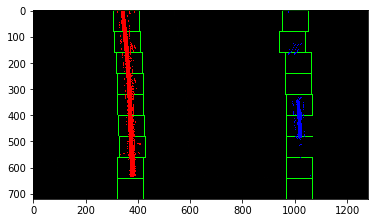

In [77]:
white_output = 'project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("project_video.mp4")
# clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process2) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [78]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>

""".format(white_output))

centre of lane  =  396.335674791
(720, 1280, 3)
(720, 1280)
[MoviePy] >>>> Building video challenge_video_output.mp4
[MoviePy] Writing video challenge_video_output.mp4


  1%|          | 1/150 [00:00<00:21,  6.95it/s]

centre of lane  =  323.143749353
(720, 1280, 3)
(720, 1280)
centre of lane  =  184.021341185


  2%|▏         | 3/150 [00:00<00:23,  6.22it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  184.593964174
(720, 1280, 3)
(720, 1280)


  3%|▎         | 4/150 [00:00<00:23,  6.18it/s]

centre of lane  =  181.698247379
(720, 1280, 3)
(720, 1280)
centre of lane  =  193.779068388


  4%|▍         | 6/150 [00:00<00:23,  6.24it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  201.396297847
(720, 1280, 3)
(720, 1280)


  5%|▍         | 7/150 [00:01<00:22,  6.26it/s]

centre of lane  =  210.699939398
(720, 1280, 3)
(720, 1280)
centre of lane  =  216.495003892


  6%|▌         | 9/150 [00:01<00:22,  6.21it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  230.31278944
(720, 1280, 3)
(720, 1280)


  7%|▋         | 10/150 [00:01<00:22,  6.32it/s]

centre of lane  =  238.685540494
(720, 1280, 3)
(720, 1280)
centre of lane  =  238.674453506
(720, 1280, 3)
(720, 1280)


  8%|▊         | 12/150 [00:01<00:21,  6.40it/s]

centre of lane  =  238.415190478
(720, 1280, 3)
(720, 1280)
centre of lane  =  237.622405876


  9%|▉         | 14/150 [00:02<00:21,  6.45it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  236.726843257
(720, 1280, 3)
(720, 1280)


 10%|█         | 15/150 [00:02<00:20,  6.44it/s]

centre of lane  =  238.68559353
(720, 1280, 3)
(720, 1280)
centre of lane  =  237.480612031
(720, 1280, 3)
(720, 1280)


 11%|█▏        | 17/150 [00:02<00:20,  6.49it/s]

centre of lane  =  237.932107746
(720, 1280, 3)
(720, 1280)
centre of lane  =  233.198287078


 13%|█▎        | 19/150 [00:03<00:20,  6.42it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  234.878428882
(720, 1280, 3)
(720, 1280)


 13%|█▎        | 20/150 [00:03<00:20,  6.41it/s]

centre of lane  =  237.811930249
(720, 1280, 3)
(720, 1280)
centre of lane  =  240.198125158


 15%|█▍        | 22/150 [00:03<00:19,  6.44it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  244.90572541
(720, 1280, 3)
(720, 1280)


 15%|█▌        | 23/150 [00:03<00:19,  6.38it/s]

centre of lane  =  247.50377014
(720, 1280, 3)
(720, 1280)
centre of lane  =  252.550730571


 17%|█▋        | 25/150 [00:03<00:20,  6.12it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  253.257505414
(720, 1280, 3)
(720, 1280)


 17%|█▋        | 26/150 [00:04<00:20,  5.98it/s]

centre of lane  =  255.675330541
(720, 1280, 3)
(720, 1280)
centre of lane  =  260.159044486


 19%|█▊        | 28/150 [00:04<00:19,  6.24it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  268.148222886
(720, 1280, 3)
(720, 1280)


 19%|█▉        | 29/150 [00:04<00:19,  6.24it/s]

centre of lane  =  273.166950826
(720, 1280, 3)
(720, 1280)
centre of lane  =  277.917969732
(720, 1280, 3)
(720, 1280)


 21%|██        | 31/150 [00:04<00:18,  6.33it/s]

centre of lane  =  279.435625019
(720, 1280, 3)
(720, 1280)
centre of lane  =  268.065553083
(720, 1280, 3)
(720, 1280)


 22%|██▏       | 33/150 [00:05<00:18,  6.27it/s]

centre of lane  =  264.083301115
(720, 1280, 3)
(720, 1280)
centre of lane  =  265.581560509


 23%|██▎       | 35/150 [00:05<00:19,  6.04it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  266.448535492
(720, 1280, 3)
(720, 1280)


 24%|██▍       | 36/150 [00:05<00:19,  5.73it/s]

centre of lane  =  266.459710501
(720, 1280, 3)
(720, 1280)
centre of lane  =  264.840457562


 25%|██▌       | 38/150 [00:06<00:18,  6.10it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  261.559490764
(720, 1280, 3)
(720, 1280)


 26%|██▌       | 39/150 [00:06<00:17,  6.28it/s]

centre of lane  =  260.113219818
(720, 1280, 3)
(720, 1280)
centre of lane  =  256.781563313
(720, 1280, 3)
(720, 1280)


 27%|██▋       | 41/150 [00:06<00:16,  6.48it/s]

centre of lane  =  253.854582104
(720, 1280, 3)
(720, 1280)
centre of lane  =  249.516111452


 28%|██▊       | 42/150 [00:06<00:16,  6.41it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  242.514780958
(720, 1280, 3)
(720, 1280)


 29%|██▉       | 44/150 [00:07<00:27,  3.81it/s]

centre of lane  =  240.025168525
(720, 1280, 3)
(720, 1280)


 30%|███       | 45/150 [00:07<00:27,  3.86it/s]

centre of lane  =  236.56227948
(720, 1280, 3)
(720, 1280)


 31%|███       | 46/150 [00:08<00:27,  3.82it/s]

centre of lane  =  234.477778358
(720, 1280, 3)
(720, 1280)


 31%|███▏      | 47/150 [00:08<00:25,  4.01it/s]

centre of lane  =  234.107540529
(720, 1280, 3)
(720, 1280)


 32%|███▏      | 48/150 [00:08<00:26,  3.89it/s]

centre of lane  =  235.133118753
(720, 1280, 3)
(720, 1280)


 33%|███▎      | 49/150 [00:08<00:24,  4.08it/s]

centre of lane  =  234.144382383
(720, 1280, 3)
(720, 1280)


 33%|███▎      | 50/150 [00:09<00:25,  3.97it/s]

centre of lane  =  234.437967144
(720, 1280, 3)
(720, 1280)


 34%|███▍      | 51/150 [00:09<00:25,  3.95it/s]

centre of lane  =  237.548868348
(720, 1280, 3)
(720, 1280)


 35%|███▍      | 52/150 [00:09<00:24,  3.96it/s]

centre of lane  =  241.747734582
(720, 1280, 3)
(720, 1280)


 35%|███▌      | 53/150 [00:09<00:24,  3.98it/s]

centre of lane  =  246.662744214
(720, 1280, 3)
(720, 1280)


 36%|███▌      | 54/150 [00:10<00:24,  3.94it/s]

centre of lane  =  252.368648346
(720, 1280, 3)
(720, 1280)


 37%|███▋      | 55/150 [00:10<00:25,  3.80it/s]

centre of lane  =  256.804508131
(720, 1280, 3)
(720, 1280)


 37%|███▋      | 56/150 [00:10<00:24,  3.82it/s]

centre of lane  =  259.975268506
(720, 1280, 3)
(720, 1280)


 38%|███▊      | 57/150 [00:10<00:24,  3.77it/s]

centre of lane  =  260.942897825
(720, 1280, 3)
(720, 1280)


 39%|███▊      | 58/150 [00:11<00:23,  4.00it/s]

centre of lane  =  261.035417443
(720, 1280, 3)
(720, 1280)


 39%|███▉      | 59/150 [00:11<00:22,  4.01it/s]

centre of lane  =  260.970529007
(720, 1280, 3)
(720, 1280)


 40%|████      | 60/150 [00:11<00:23,  3.81it/s]

centre of lane  =  256.75620106
(720, 1280, 3)
(720, 1280)


 41%|████      | 61/150 [00:11<00:22,  3.99it/s]

centre of lane  =  255.009615645
(720, 1280, 3)
(720, 1280)


 41%|████▏     | 62/150 [00:12<00:22,  3.89it/s]

centre of lane  =  252.838488034
(720, 1280, 3)
(720, 1280)


 42%|████▏     | 63/150 [00:12<00:21,  4.05it/s]

centre of lane  =  252.236837677
(720, 1280, 3)
(720, 1280)


 43%|████▎     | 64/150 [00:12<00:22,  3.88it/s]

centre of lane  =  251.367539715
(720, 1280, 3)
(720, 1280)


 43%|████▎     | 65/150 [00:12<00:20,  4.09it/s]

centre of lane  =  250.475533593
(720, 1280, 3)
(720, 1280)


 44%|████▍     | 66/150 [00:13<00:20,  4.03it/s]

centre of lane  =  249.815489576
(720, 1280, 3)
(720, 1280)


 45%|████▍     | 67/150 [00:13<00:19,  4.24it/s]

centre of lane  =  248.975610467
(720, 1280, 3)
(720, 1280)


 45%|████▌     | 68/150 [00:13<00:20,  4.07it/s]

centre of lane  =  248.726445527
(720, 1280, 3)
(720, 1280)


 46%|████▌     | 69/150 [00:13<00:18,  4.27it/s]

centre of lane  =  247.61440296
(720, 1280, 3)
(720, 1280)


 47%|████▋     | 70/150 [00:14<00:19,  4.05it/s]

centre of lane  =  248.193886349
(720, 1280, 3)
(720, 1280)


 47%|████▋     | 71/150 [00:14<00:18,  4.21it/s]

centre of lane  =  248.651454537
(720, 1280, 3)
(720, 1280)


 48%|████▊     | 72/150 [00:14<00:19,  3.99it/s]

centre of lane  =  246.38446816
(720, 1280, 3)
(720, 1280)


 49%|████▊     | 73/150 [00:14<00:18,  4.17it/s]

centre of lane  =  245.818224992
(720, 1280, 3)
(720, 1280)


 49%|████▉     | 74/150 [00:14<00:18,  4.10it/s]

centre of lane  =  245.6300724
(720, 1280, 3)
(720, 1280)


 50%|█████     | 75/150 [00:15<00:18,  4.13it/s]

centre of lane  =  247.128112671
(720, 1280, 3)
(720, 1280)


 51%|█████     | 76/150 [00:15<00:18,  4.10it/s]

centre of lane  =  251.064059749
(720, 1280, 3)
(720, 1280)


 51%|█████▏    | 77/150 [00:15<00:18,  4.02it/s]

centre of lane  =  257.629606695
(720, 1280, 3)
(720, 1280)


 52%|█████▏    | 78/150 [00:15<00:17,  4.07it/s]

centre of lane  =  259.460236935
(720, 1280, 3)
(720, 1280)


 53%|█████▎    | 79/150 [00:16<00:18,  3.83it/s]

centre of lane  =  263.894433562
(720, 1280, 3)
(720, 1280)


 53%|█████▎    | 80/150 [00:16<00:17,  4.08it/s]

centre of lane  =  264.996719461
(720, 1280, 3)
(720, 1280)


 54%|█████▍    | 81/150 [00:16<00:17,  4.04it/s]

centre of lane  =  263.515123766
(720, 1280, 3)
(720, 1280)


 55%|█████▍    | 82/150 [00:16<00:16,  4.25it/s]

centre of lane  =  262.825340938
(720, 1280, 3)
(720, 1280)


 55%|█████▌    | 83/150 [00:17<00:16,  4.16it/s]

centre of lane  =  261.893312982
(720, 1280, 3)
(720, 1280)


 56%|█████▌    | 84/150 [00:17<00:16,  3.95it/s]

centre of lane  =  261.273901678
(720, 1280, 3)
(720, 1280)


 57%|█████▋    | 85/150 [00:17<00:15,  4.15it/s]

centre of lane  =  257.28578696
(720, 1280, 3)
(720, 1280)


 57%|█████▋    | 86/150 [00:17<00:15,  4.05it/s]

centre of lane  =  253.240845144
(720, 1280, 3)
(720, 1280)


 58%|█████▊    | 87/150 [00:18<00:14,  4.25it/s]

centre of lane  =  252.97564159
(720, 1280, 3)
(720, 1280)


 59%|█████▊    | 88/150 [00:18<00:15,  4.00it/s]

centre of lane  =  252.065386963
(720, 1280, 3)
(720, 1280)


 59%|█████▉    | 89/150 [00:18<00:14,  4.11it/s]

centre of lane  =  249.107483489
(720, 1280, 3)
(720, 1280)


 60%|██████    | 90/150 [00:18<00:15,  3.95it/s]

centre of lane  =  246.232565716
(720, 1280, 3)
(720, 1280)


 61%|██████    | 91/150 [00:19<00:14,  4.18it/s]

centre of lane  =  246.221912767
(720, 1280, 3)
(720, 1280)


 61%|██████▏   | 92/150 [00:19<00:13,  4.15it/s]

centre of lane  =  242.693414537
(720, 1280, 3)
(720, 1280)


 62%|██████▏   | 93/150 [00:19<00:14,  4.06it/s]

centre of lane  =  241.937877135
(720, 1280, 3)
(720, 1280)


 63%|██████▎   | 94/150 [00:19<00:13,  4.08it/s]

centre of lane  =  240.59086945
(720, 1280, 3)
(720, 1280)


 63%|██████▎   | 95/150 [00:20<00:14,  3.77it/s]

centre of lane  =  239.593366736
(720, 1280, 3)
(720, 1280)


 64%|██████▍   | 96/150 [00:20<00:13,  3.94it/s]

centre of lane  =  236.480889946
(720, 1280, 3)
(720, 1280)


 65%|██████▍   | 97/150 [00:20<00:13,  3.97it/s]

centre of lane  =  237.799394008
(720, 1280, 3)
(720, 1280)


 65%|██████▌   | 98/150 [00:20<00:12,  4.11it/s]

centre of lane  =  241.722907123
(720, 1280, 3)
(720, 1280)


 66%|██████▌   | 99/150 [00:21<00:12,  4.19it/s]

centre of lane  =  244.724654236
(720, 1280, 3)
(720, 1280)


 67%|██████▋   | 100/150 [00:21<00:12,  4.16it/s]

centre of lane  =  247.002059162
(720, 1280, 3)
(720, 1280)


 67%|██████▋   | 101/150 [00:21<00:11,  4.27it/s]

centre of lane  =  251.101858272
(720, 1280, 3)
(720, 1280)


 68%|██████▊   | 102/150 [00:21<00:10,  4.39it/s]

centre of lane  =  256.051874222
(720, 1280, 3)
(720, 1280)
centre of lane  =  263.529065464


 69%|██████▊   | 103/150 [00:22<00:11,  4.17it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  264.078807758


 69%|██████▉   | 104/150 [00:22<00:10,  4.30it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  270.617905396


 70%|███████   | 105/150 [00:22<00:10,  4.30it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  270.086828039


 71%|███████   | 106/150 [00:22<00:10,  4.20it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  270.964711627


 71%|███████▏  | 107/150 [00:22<00:09,  4.32it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  271.048480664


 72%|███████▏  | 108/150 [00:23<00:09,  4.45it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  274.639442817


 73%|███████▎  | 109/150 [00:23<00:09,  4.23it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  275.606928492


 73%|███████▎  | 110/150 [00:23<00:09,  4.19it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  277.29338514


 74%|███████▍  | 111/150 [00:23<00:08,  4.36it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  277.657274384


 75%|███████▍  | 112/150 [00:24<00:09,  4.11it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  276.438867531


 75%|███████▌  | 113/150 [00:24<00:08,  4.23it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  277.412877915


 76%|███████▌  | 114/150 [00:24<00:08,  4.35it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  278.439973944


 77%|███████▋  | 115/150 [00:24<00:08,  4.14it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  278.169212789


 77%|███████▋  | 116/150 [00:25<00:08,  4.25it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  276.356765563


 78%|███████▊  | 117/150 [00:25<00:07,  4.36it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  274.483872819


 79%|███████▊  | 118/150 [00:25<00:07,  4.28it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  271.033794955


 79%|███████▉  | 119/150 [00:25<00:07,  4.24it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  265.35243367


 80%|████████  | 120/150 [00:26<00:06,  4.33it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  263.253573444


 81%|████████  | 121/150 [00:26<00:06,  4.21it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  260.890770486


 81%|████████▏ | 122/150 [00:26<00:06,  4.24it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  259.763851677


 82%|████████▏ | 123/150 [00:26<00:06,  4.14it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  258.486304522


 83%|████████▎ | 124/150 [00:26<00:06,  4.27it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  257.654371168


 83%|████████▎ | 125/150 [00:27<00:05,  4.40it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  256.64579419


 84%|████████▍ | 126/150 [00:27<00:05,  4.35it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  259.298980429


 85%|████████▍ | 127/150 [00:27<00:05,  4.31it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  260.999193954


 85%|████████▌ | 128/150 [00:27<00:05,  4.36it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  260.773649481


 86%|████████▌ | 129/150 [00:28<00:05,  4.17it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  263.319314774


 87%|████████▋ | 130/150 [00:28<00:04,  4.28it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  267.354726551


 87%|████████▋ | 131/150 [00:28<00:04,  4.36it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  266.615355199


 88%|████████▊ | 132/150 [00:28<00:04,  4.14it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  266.697694778


 89%|████████▊ | 133/150 [00:29<00:03,  4.32it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  268.333519961


 89%|████████▉ | 134/150 [00:29<00:03,  4.21it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  267.395164724


 90%|█████████ | 135/150 [00:29<00:03,  4.30it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  264.29271157


 91%|█████████ | 136/150 [00:29<00:03,  4.42it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  264.747877667


 91%|█████████▏| 137/150 [00:30<00:03,  4.20it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  263.145829518


 92%|█████████▏| 138/150 [00:30<00:02,  4.31it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  262.534464698


 93%|█████████▎| 139/150 [00:30<00:02,  4.43it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  263.043940736


 93%|█████████▎| 140/150 [00:30<00:02,  4.02it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  265.600465777


 94%|█████████▍| 141/150 [00:30<00:02,  4.11it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  265.553264096


 95%|█████████▍| 142/150 [00:31<00:01,  4.26it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  267.560689318


 95%|█████████▌| 143/150 [00:31<00:01,  4.10it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  268.528193134


 96%|█████████▌| 144/150 [00:31<00:01,  4.02it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  266.181880019


 97%|█████████▋| 145/150 [00:31<00:01,  4.15it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  265.237916559


 97%|█████████▋| 146/150 [00:32<00:00,  4.26it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  263.909217263


 98%|█████████▊| 147/150 [00:32<00:00,  4.17it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  259.943058891


 99%|█████████▊| 148/150 [00:32<00:00,  4.17it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  256.737691389


 99%|█████████▉| 149/150 [00:32<00:00,  4.13it/s]

(720, 1280, 3)
(720, 1280)
centre of lane  =  253.190898611


100%|██████████| 150/150 [00:33<00:00,  4.26it/s]

(720, 1280, 3)
(720, 1280)


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_output.mp4 

CPU times: user 16.5 s, sys: 3.15 s, total: 19.6 s
Wall time: 36.4 s


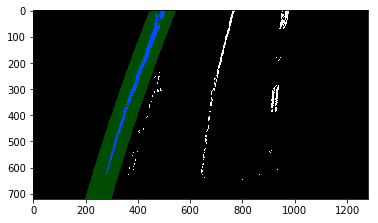

In [19]:
white_output = 'challenge_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("challenge_video.mp4").subclip(5,10)
# clip1 = VideoFileClip("challenge_video.mp4")
white_clip = clip1.fl_image(process2) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [20]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>

""".format(white_output))